# Name: KELVIN KIPKEMBOI, SID: 2161812
Previous Group:2 (ADRIEN MONTAIGNE, JOSEPH KODUAH, UZOECHI FREDERICK CHUKWUDI)
ELEMENT 010: APPLIED RESEARCH METHODOLOGY (MOD007893) 
SID:2161812

In [ ]:
 ***************************************************************************************/
*    Title: Pfizer Vaccine Sentiment And Time Series Analysis
*    Author: Thomas Konstantin
*    Date: 2021
*    Code version: 139.0
*    Availability: http://www.kaggle.com
*
***************************************************************************************/
(Version 139.0) [Source code]. https://www.kaggle.com/code/thomaskonstantin/pfizer-vaccine-sentiment-and-time-series-analysis

In [ ]:
 ***************************************************************************************/
*    Title: Covid-19 Tweets/EDA/WordCloud/Sentiment Analysis
*    Author: Homayoon khadivi
*    Date: 2021
*    Code version: 1
*    Availability: http://www.kaggle.com
*
***************************************************************************************/
(Version 139.0) [Source code]. https://www.kaggle.com/code/homayoonkhadivi/covid-19-tweets-eda-wordcloud-sentiment-analysis#Vectorizing

In [557]:
#If you use the VADER sentiment analysis tools, please cite:

#  Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for
#  Sentiment Analysis of Social Media Text. Eighth International Conference on
#  Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.
  

### Step 1: Importing Libraries

In [610]:
#Data Manipulation
import pandas as pd
import numpy as np

#Data Preprocessing
import random
import nltk
import string
import re
from sklearn.decomposition import TruncatedSVD,PCA
from sklearn.feature_extraction.text import CountVectorizer

from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from nltk.util import ngrams
from nltk import word_tokenize
from nltk.tokenize import TweetTokenizer 
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer


#Sentimental Analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#Machine Learning
from sklearn.cluster import KMeans


#Data visualization
import matplotlib.pyplot as plt
import scipy as sc
import seaborn as sns

### Step 2: Importing dataset

In [611]:
df = pd.read_csv("vaccination_tweets.csv")
df.head(10)

id             user_name                user_location  \
0  1340539111971516416            Rachel Roh    La Crescenta-Montrose, CA   
1  1338158543359250433           Albert Fong            San Francisco, CA   
2  1337858199140118533              eli🇱🇹🇪🇺👌                     Your Bed   
3  1337855739918835717         Charles Adler       Vancouver, BC - Canada   
4  1337854064604966912  Citizen News Channel                          NaN   
5  1337852648389832708                   Dee          Birmingham, England   
6  1337851215875608579     Gunther Fehlinger  Austria, Ukraine and Kosovo   
7  1337850832256176136   Dr.Krutika Kuppalli                          NaN   
8  1337850023531347969           Erin Despas                          NaN   
9  1337842295857623042          Ch.Amjad Ali                    Islamabad   

                                    user_description         user_created  \
0  Aggregator of Asian American news; scanning di...  2009-04-08 17:52:46   
1  Marketing dude, tech geek, heavy metal & '80s ...  2009-09-21 15:27:30   
2                                     heil, hydra 🖐☺  2020-06-25 23:30:28   
3  Hosting "CharlesAdlerTonight" Global News Radi...  2008-09-10 11:28:53   
4  Citizen News Channel bringing you an alternati...  2020-04-23 17:58:42   
5  Gastroenterology trainee, Clinical Research Fe...  2020-01-26 21:43:12   
6  End North Stream 2 now - the pipeline of corru...  2013-06-10 17:49:22   
7  ID, Global Health, VHF, Pandemic Prep, Emergin...  2019-03-25 04:14:29   
8  Designing&selling on Teespring. Like 90s Disne...  2009-10-30 17:53:54   
9  #ProudPakistani #LovePakArmy #PMIK @insafiansp...  2012-11-12 04:18:12   

   user_followers  user_friends  user_favourites  user_verified  \
0             405          1692             3247          False   
1             834           666              178          False   
2              10            88              155          False   
3           49165          3933            21853           True   
4             152           580             1473          False   
5             105           108              106          False   
6            2731          5001            69344          False   
7           21924           593             7815           True   
8             887          1515             9639          False   
9             671          2368            20469          False   

                  date                                               text  \
0  2020-12-20 06:06:44  Same folks said daikon paste could treat a cyt...   
1  2020-12-13 16:27:13  While the world has been on the wrong side of ...   
2  2020-12-12 20:33:45  #coronavirus #SputnikV #AstraZeneca #PfizerBio...   
3  2020-12-12 20:23:59  Facts are immutable, Senator, even when you're...   
4  2020-12-12 20:17:19  Explain to me again why we need a vaccine @Bor...   
5  2020-12-12 20:11:42  Does anyone have any useful advice/guidance fo...   
6  2020-12-12 20:06:00  it is a bit sad to claim the fame for success ...   
7  2020-12-12 20:04:29  There have not been many bright days in 2020 b...   
8  2020-12-12 20:01:16  Covid vaccine; You getting it?\n\n #CovidVacci...   
9  2020-12-12 19:30:33  #CovidVaccine \n\nStates will start getting #C...   

                                            hashtags               source  \
0                                 ['PfizerBioNTech']  Twitter for Android   
1                                                NaN      Twitter Web App   
2  ['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...  Twitter for Android   
3                                                NaN      Twitter Web App   
4     ['whereareallthesickpeople', 'PfizerBioNTech']   Twitter for iPhone   
5                                                NaN   Twitter for iPhone   
6                                    ['vaccination']      Twitter Web App   
7                    ['BidenHarris', 'Election2020']   Twitter for iPhone   
8  ['CovidVaccine', 'covid19', 'PfizerBioNTec

In [612]:
df.describe

<bound method NDFrame.describe of                         id             user_name              user_location  \
0      1340539111971516416            Rachel Roh  La Crescenta-Montrose, CA   
1      1338158543359250433           Albert Fong          San Francisco, CA   
2      1337858199140118533              eli🇱🇹🇪🇺👌                   Your Bed   
3      1337855739918835717         Charles Adler     Vancouver, BC - Canada   
4      1337854064604966912  Citizen News Channel                        NaN   
...                    ...                   ...                        ...   
11015  1460932683630977025                theSun              Petaling Jaya   
11016  1460809350792896516                 Sujan                        NaN   
11017  1460581918295031809                theSun              Petaling Jaya   
11018  1460344277951782922      Aleksejs Jackovs                    Ireland   
11019  1460208097956225028                theSun              Petaling Jaya   

                 

In [613]:
df.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')

###  Duplicates Check

In [614]:
#Get the dataframe shape, row entries and columns
df.shape 

(11020, 16)

In [615]:
#By setting keep on False, all duplicates are True.
df.duplicated(keep=False).sum()

0

In [616]:
#Alternatively, Checking the length using ID attribute to ensure unique records of the tweets.
duplicated = set(df['id'])
print(len(duplicated))

11020


In [617]:
df.drop_duplicates() #Dropping duplicates in the dataset

id             user_name              user_location  \
0      1340539111971516416            Rachel Roh  La Crescenta-Montrose, CA   
1      1338158543359250433           Albert Fong          San Francisco, CA   
2      1337858199140118533              eli🇱🇹🇪🇺👌                   Your Bed   
3      1337855739918835717         Charles Adler     Vancouver, BC - Canada   
4      1337854064604966912  Citizen News Channel                        NaN   
...                    ...                   ...                        ...   
11015  1460932683630977025                theSun              Petaling Jaya   
11016  1460809350792896516                 Sujan                        NaN   
11017  1460581918295031809                theSun              Petaling Jaya   
11018  1460344277951782922      Aleksejs Jackovs                    Ireland   
11019  1460208097956225028                theSun              Petaling Jaya   

                                        user_description         user_created  \
0      Aggregator of Asian American news; scanning di...  2009-04-08 17:52:46   
1      Marketing dude, tech geek, heavy metal & '80s ...  2009-09-21 15:27:30   
2                                         heil, hydra 🖐☺  2020-06-25 23:30:28   
3      Hosting "CharlesAdlerTonight" Global News Radi...  2008-09-10 11:28:53   
4      Citizen News Channel bringing you an alternati...  2020-04-23 17:58:42   
...                                                  ...                  ...   
11015  Breaking news updates from the website of Mala...  2009-07-29 01:58:44   
11016  ________________________ •Napricorn• •It's jus...  2013-01-28 11:48:20   
11017  Breaking news updates from the website of Mala...  2009-07-29 01:58:44   
11018  #Scientificresearcher in #InformationTechnolog...  2012-08-13 13:47:03   
11019  Breaking news updates from the website of Mala...  2009-07-29 01:58:44   

       user_followers  user_friends  user_favourites  user_verified  \
0                 405          1692             3247          False   
1                 834           666              178          False   
2                  10            88              155          False   
3               49165          3933            21853           True   
4                 152           580             1473          False   
...               ...           ...              ...            ...   
11015          151937           465              593          False   
11016            4259           622           156941          False   
11017          151937           465              593          False   
11018               1            38               99          False   
11019          151937           465              593          False   

                      date                                               text  \
0      2020-12-20 06:06:44  Same folks said daikon paste could treat a cyt...   
1      2020-12-13 16:27:13  While the world has been on the wrong side of ...   
2      2020-12-12 20:33:45  #coronavirus #SputnikV #AstraZeneca #PfizerBio...   
3      2020-12-12 20:23:59  Facts are immutable, Senator, even when you're...   
4      2020-12-12 20:17:19  Explain to me again why we need a vaccine @Bor...   
...                    ...                                                ...   
11015  2021-11-17 11:27:49  The number of Covid-19 cases today, 17 Novembe...   
11016  2021-11-17 03:17:44                      First dose ✅\n#PfizerBioNTech   
11017  2021-11-16 12:14:00  The number of Covid-19 cases today, 16 Novembe...   
11018  2021-11-15 20:29:42  #PfizerBioNTech has developed new pill #Paxlov...   
11019  2021-11-15 11:28:34  The number of Covid-19 cases today, 15 Novembe...   

                                                hashtags               source  \
0                                     ['PfizerBioNTech']  Twitter for Android   
1                                                    NaN      Twitter Web App   
2      ['coronavirus', 'SputnikV'

In [618]:
df.shape #No duplicates since the shape of the dataset remains the same after running drop_duplicates command

(11020, 16)

### Missing Values Check

In [619]:
#Get total number of missing values
df.isnull().sum()

id                     0
user_name              0
user_location       2270
user_description     679
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            2582
source                 1
retweets               0
favorites              0
is_retweet             0
dtype: int64

In [620]:
#Check source of our dataset
df["source"]

0        Twitter for Android
1            Twitter Web App
2        Twitter for Android
3            Twitter Web App
4         Twitter for iPhone
                ...         
11015        Twitter Web App
11016    Twitter for Android
11017        Twitter Web App
11018        Twitter Web App
11019        Twitter Web App
Name: source, Length: 11020, dtype: object

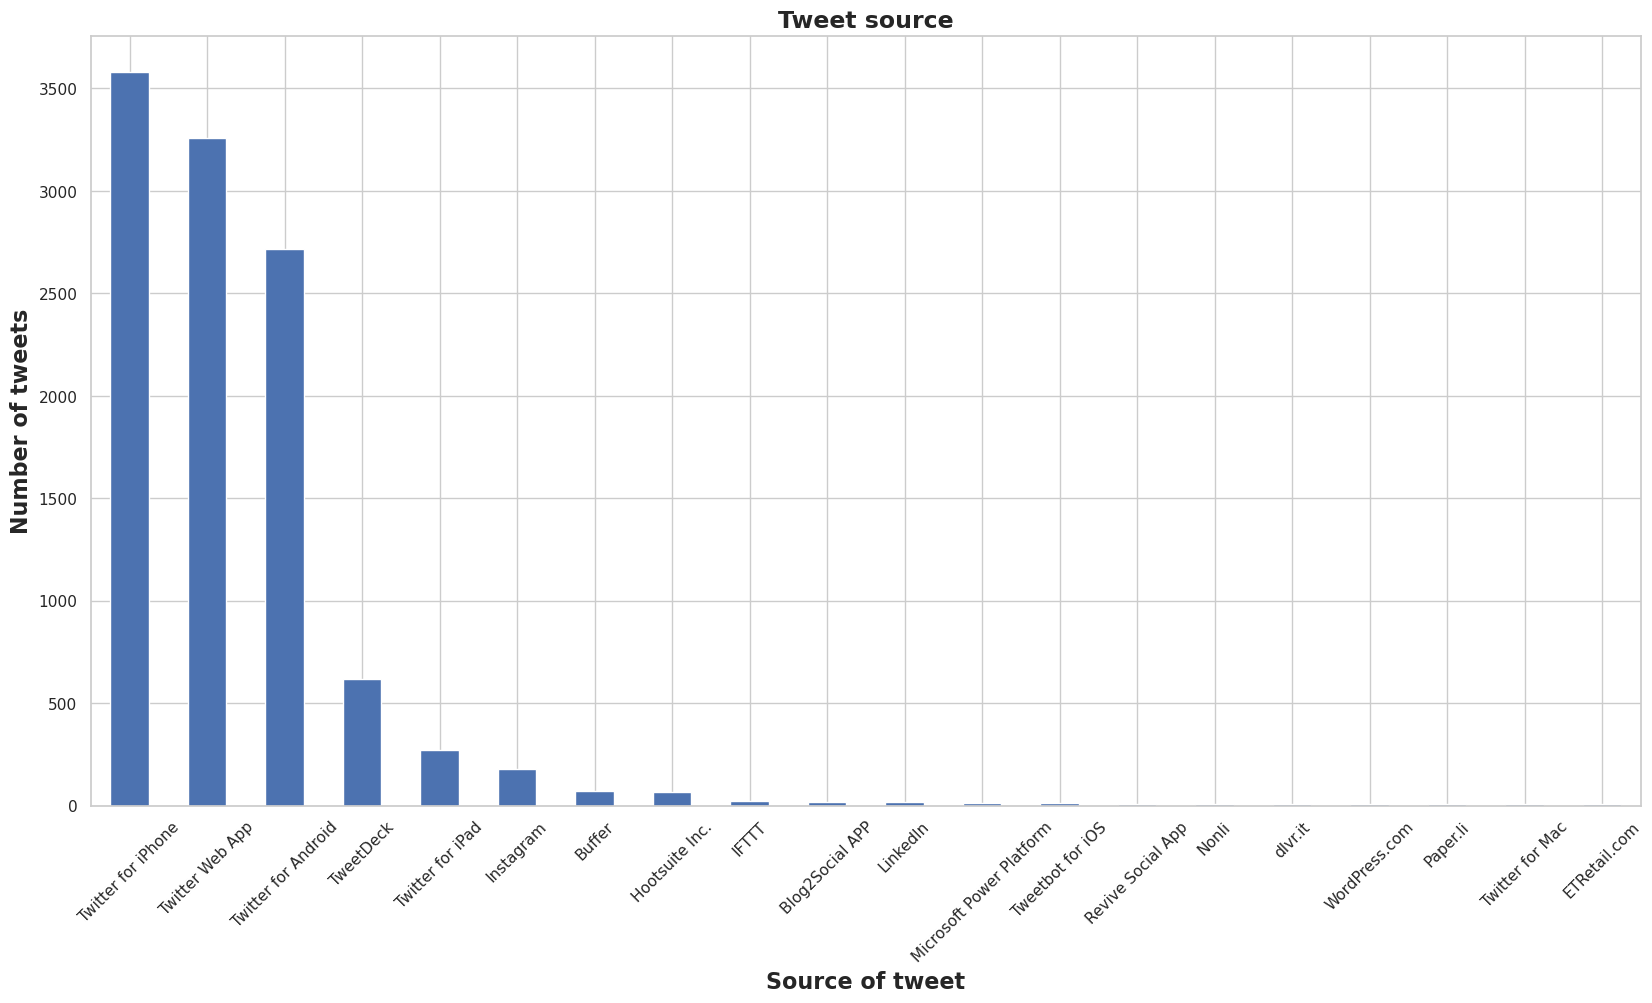

In [621]:
#Plot the top sources
plt.figure(figsize=(20,10))
df['source'].value_counts().nlargest(20).plot(kind='bar')
plt.xticks(rotation=45)
plt.xlabel("Source of tweet", size=16, weight="bold")
plt.ylabel("Number of tweets", size=16, weight="bold")
plt.title("Tweet source",fontweight="bold",size=17)
plt.show()

In [622]:
missing_values = pd.DataFrame()
missing_values['column'] = df.columns

missing_values['percent'] = [round(100* df[col].isnull().sum() / len(df), 2) for col in df.columns]
missing_values = missing_values.sort_values('percent')
missing_values = missing_values[missing_values['percent']>0]

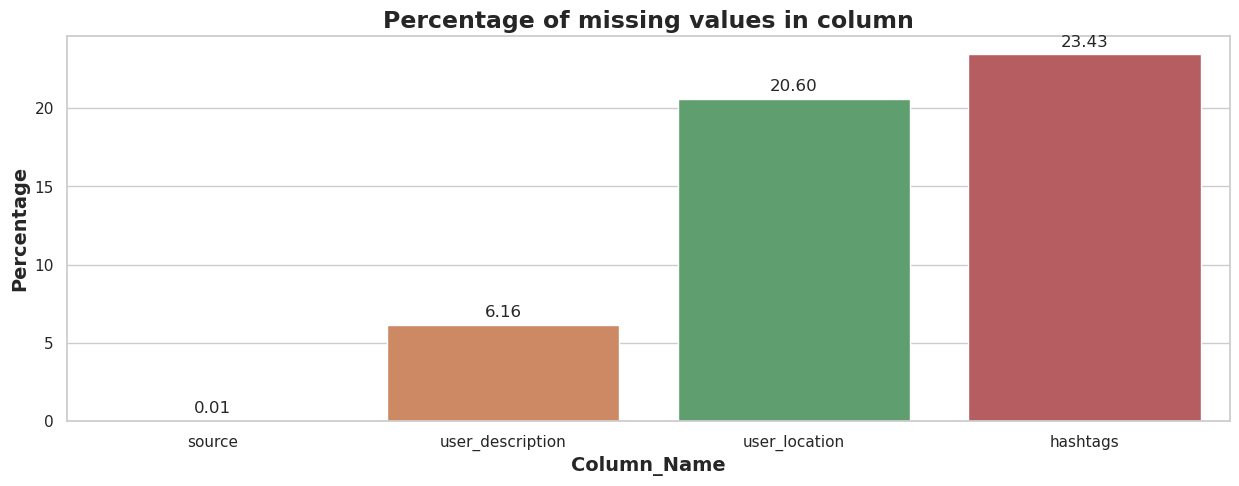

In [623]:
#From our dataset, this code shows columns with missing values: Three columns
plt.figure(figsize=(15, 5))
sns.set(style='whitegrid', color_codes=True)
splot=sns.barplot(x='column', y='percent', data=missing_values)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.xlabel("Column_Name", size=14, weight="bold")
plt.ylabel("Percentage", size=14, weight="bold")
plt.title("Percentage of missing values in column",fontweight="bold",size=17)
plt.show()

In [635]:
#find hashtags with top 30 occurrences
top_30_hashtags = df['hashtags'].value_counts().nlargest(30)
top_30_hashtags

['PfizerBioNTech']                              1085
['PfizerBiontech']                               471
['COVID19']                                       95
['PfizerBioNTech', 'CovidVaccine']                93
['PfizerBioNTech', 'vaccine']                     81
['PfizerBioNTech', 'COVID19']                     67
['CovidVaccine']                                  63
['Pfizer']                                        55
['CovidVaccine', 'PfizerBioNTech']                52
['PfizerBioNtech']                                47
['vaccine']                                       42
['COVID19', 'PfizerBioNTech']                     42
['pfizerbiontech']                                39
['PfizerBioNTech', 'Moderna']                     36
['PfizerBioNTech', 'COVID19Vaccine']              32
['PfizerVaccine']                                 31
['AstraZeneca']                                   30
['Pfizer', 'USA', 'Bangladesh']                   27
['NSTnation']                                 

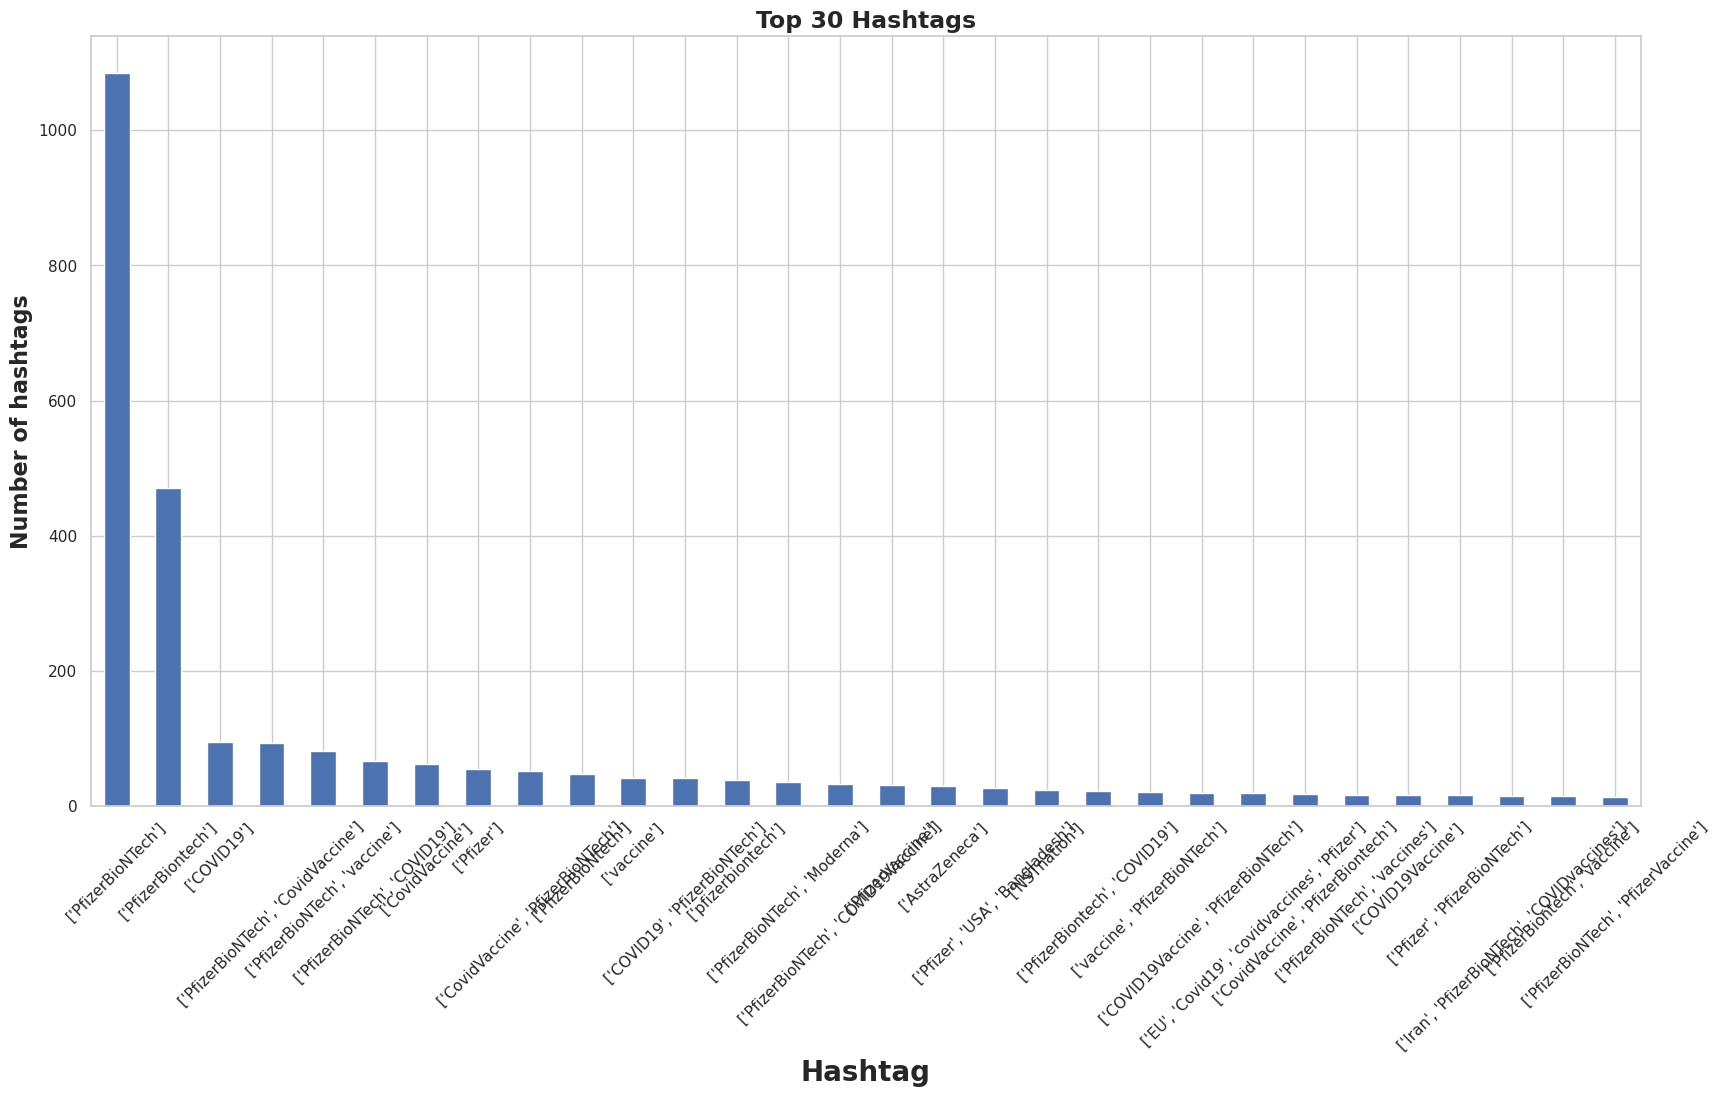

In [653]:
#Plot the top hashtags
plt.figure(figsize=(20,10))
df['hashtags'].value_counts().nlargest(30).plot(kind='bar')
plt.xticks(rotation=45)
plt.xlabel("Hashtag", size=20, weight="bold")
plt.ylabel("Number of hashtags", size=16, weight="bold")
plt.title("Top 30 Hashtags",fontweight="bold",size=17)
plt.show()

### Step 3: Data Pre-Processing

### Data Encoding

In [576]:
df["user_verified"] = df["user_verified"].astype(int)


### Extracting the date 

In [577]:
df = df.sort_values(by='date')
df=df.copy()
df['date'] = pd.to_datetime(df['date']).dt.date

df["year"] = pd.DatetimeIndex(df['date']).year
df["month"] = pd.DatetimeIndex(df['date']).month
df["day"] = pd.DatetimeIndex(df['date']).day
df['day_of_year']  = pd.DatetimeIndex(df['date']).dayofyear

In [578]:
df.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet', 'year', 'month', 'day', 'day_of_year'],
      dtype='object')

### Drop Un-necessary Columns

In [579]:
df = df.drop(["id","user_name","user_location", "user_description","user_created","date","day_of_year", "user_friends","user_favourites","is_retweet"], axis=1)

In [580]:
df.head(10)

user_followers  user_verified  \
44          278080              1   
43           66224              1   
42              14              0   
41            2035              0   
40             761              0   
39             761              0   
38            2035              0   
37             293              0   
36               2              0   
35           41708              0   

                                                 text  \
44  #FDA authorizes #PfizerBioNTech #coronavirus v...   
43  Trump announces #vaccine rollout 'in less than...   
42  #CovidVaccine #Pfizer-BioNTech COVID-19 #Pfize...   
41  FACT SHEET FOR RECIPIENTS AND CAREGIVERS\n\n#P...   
40  @mirekR9 @sputnikvaccine @AstraZeneca it's the...   
39  @mirekR9 @sputnikvaccine @AstraZeneca check ou...   
38  FACT SHEET FOR HEALTHCARE PROVIDERS ADMINISTER...   
37  Ladies and Gentlemen, now we have #CovidVaccin...   
36  The #FDA finally issues #EUA now comes the pro...   
35  An immigrant Muslim couple find the COVID-19 V...   

                                             hashtags               source  \
44           ['FDA', 'PfizerBioNTech', 'coronavirus']      Twitter Web App   
43                                        ['vaccine']      Twitter Web App   
42  ['CovidVaccine', 'Pfizer', 'PfizerBioNTech', '...   Twitter for iPhone   
41                 ['PfizerBioNTech', 'CovidVaccine']      Twitter Web App   
40                                 ['PfizerBioNTech']      Twitter Web App   
39                                                NaN      Twitter Web App   
38                 ['PfizerBioNTech', 'CovidVaccine']      Twitter Web App   
37  ['CovidVaccine', 'Pakistan', 'PfizerBioNTech',...  Twitter for Android   
36                   ['FDA', 'EUA', 'PfizerBioNTech']      Twitter Web App   
35  ['CovidVaccine', 'PfizerBioNTech', 'Pfizervacc...   Twitter for iPhone   

    retweets  favorites  year  month  day  
44         1          1  2020     12   12  
43         0          2  2020     12   12  
42         0          1  2020     12   12  
41         0          0  2020     12   12  
40         0          0  2020     12   12  
39         0          0  2020     12   12  
38         0          0  2020     12   12  
37         0          0  2020     12   12  
36         0          0  2020     12   12  
35         2         37  2020     12   12

In [581]:
df.tail(10)

user_followers  user_verified  \
10968             474              0   
10967          151937              0   
10966            3088              0   
10965          151937              0   
10964              25              0   
10963            1987              0   
10962            2301              0   
10961            2375              0   
10960             184              0   
10959             498              0   

                                                    text  \
10968  #Israel began rolling out #PfizerBioNtech #COV...   
10967  The number of Covid-19 cases as of 22 November...   
10966  Fully Vaccinated na. Yayyyy! 💙 #pfizerbiontech...   
10965  The number of Covid-19 cases today, 23 Novembe...   
10964  Study describes the safety and side effect pro...   
10963  The expansion is valid for both Moderna and Pf...   
10962  #Moderna and #PfizerBioNTech \n\nFull report: ...   
10961  Nothing to see here 👀\n\n#Health #heartattack ...   
10960  #PfizerBiontech #CovidVaccines  the effects #M...   
10959  #PfizerBiontech #vaccination #pfizer #Covid_19...   

                                                hashtags               source  \
10968  ['Israel', 'PfizerBioNtech', 'COVID19vaccinati...  Twitter for Android   
10967                                                NaN      Twitter Web App   
10966                                 ['pfizerbiontech']            Instagram   
10965                                                NaN      Twitter Web App   
10964  ['PfizerBioNTech', 'COVID19', 'vaccination', '...      Twitter Web App   
10963                                                NaN        Sprout Social   
10962                      ['Moderna', 'PfizerBioNTech']      Twitter Web App   
10961  ['Health', 'heartattack', 'myocarditis', 'peri...   Twitter for iPhone   
10960         ['PfizerBiontech', 'CovidVaccines', 'MSM']      Twitter Web App   
10959  ['PfizerBiontech', 'vaccination', 'pfizer', 'C...  Twitter for Android   

       retweets  favorites  year  month  day  
10968         0          0  2021     11   23  
10967         1          3  2021     11   23  
10966         0          0  2021     11   23  
10965         6          7  2021     11   23  
10964         0          0  2021     11   23  
10963         0          0  2021     11   23  
10962         0          0  2021     11   23  
10961         0          0  2021     11   23  
10960         0          0  2021     11   23  
10959         0          0  2021     11   23

In [582]:
# Now our dataset is clear of unnecessary columns, we can do text transformations

### Text cleaning

### a) Change to lowercase

In [583]:
df['text']=df['text'].str.lower()
df

user_followers  user_verified  \
44             278080              1   
43              66224              1   
42                 14              0   
41               2035              0   
40                761              0   
...               ...            ...   
10963            1987              0   
10962            2301              0   
10961            2375              0   
10960             184              0   
10959             498              0   

                                                    text  \
44     #fda authorizes #pfizerbiontech #coronavirus v...   
43     trump announces #vaccine rollout 'in less than...   
42     #covidvaccine #pfizer-biontech covid-19 #pfize...   
41     fact sheet for recipients and caregivers\n\n#p...   
40     @mirekr9 @sputnikvaccine @astrazeneca it's the...   
...                                                  ...   
10963  the expansion is valid for both moderna and pf...   
10962  #moderna and #pfizerbiontech \n\nfull report: ...   
10961  nothing to see here 👀\n\n#health #heartattack ...   
10960  #pfizerbiontech #covidvaccines  the effects #m...   
10959  #pfizerbiontech #vaccination #pfizer #covid_19...   

                                                hashtags               source  \
44              ['FDA', 'PfizerBioNTech', 'coronavirus']      Twitter Web App   
43                                           ['vaccine']      Twitter Web App   
42     ['CovidVaccine', 'Pfizer', 'PfizerBioNTech', '...   Twitter for iPhone   
41                    ['PfizerBioNTech', 'CovidVaccine']      Twitter Web App   
40                                    ['PfizerBioNTech']      Twitter Web App   
...                                                  ...                  ...   
10963                                                NaN        Sprout Social   
10962                      ['Moderna', 'PfizerBioNTech']      Twitter Web App   
10961  ['Health', 'heartattack', 'myocarditis', 'peri...   Twitter for iPhone   
10960         ['PfizerBiontech', 'CovidVaccines', 'MSM']      Twitter Web App   
10959  ['PfizerBiontech', 'vaccination', 'pfizer', 'C...  Twitter for Android   

       retweets  favorites  year  month  day  
44            1          1  2020     12   12  
43            0          2  2020     12   12  
42            0          1  2020     12   12  
41            0          0  2020     12   12  
40            0          0  2020     12   12  
...         ...        ...   ...    ...  ...  
10963         0          0  2021     11   23  
10962         0          0  2021     11   23  
10961         0          0  2021     11   23  
10960         0          0  2021     11   23  
10959         0          0  2021     11   23  

[11020 rows x 10 columns]

### b) Drop Urls, handles, links, numbers,special characters and punctuation,single characters, mentions and numbers

In [584]:
df["text"] = df["text"].apply(lambda x:re.sub(r"http\S+", "", x)) #Remove URLs
df["text"] = df["text"].apply(lambda x:re.sub(r'\B#\S+','',x)) #Remove hashtag symbols
df["text"] = df["text"].apply(lambda x:re.sub('@[^\s]+','',x)) #Remove twitter handles
df["text"] = df["text"].apply(lambda x:' '.join(re.findall(r'\w+', x))) #Remove all special characters
df["text"] = df["text"].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))#remove all single characters
df["text"] = df["text"].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))# Turn multiple spaces to single space
df["text"] = df["text"].apply(lambda x:re.sub('[0-9]+', '', x))#remove all numbers

In [585]:
df.isnull().sum()

user_followers       0
user_verified        0
text                 0
hashtags          2582
source               1
retweets             0
favorites            0
year                 0
month                0
day                  0
dtype: int64

In [586]:
#Drop day of year
df

user_followers  user_verified  \
44             278080              1   
43              66224              1   
42                 14              0   
41               2035              0   
40                761              0   
...               ...            ...   
10963            1987              0   
10962            2301              0   
10961            2375              0   
10960             184              0   
10959             498              0   

                                                    text  \
44                  authorizes vaccine for emergency use   
43     trump announces rollout in less than  hours th...   
42                                                covid    
41              fact sheet for recipients and caregivers   
40     itthe only one which doesnhave any side effect...   
...                                                  ...   
10963  the expansion is valid for both moderna and pf...   
10962                                    and full report   
10961                                nothing to see here   
10960  the effects are hiding and not reporting autoa...   
10959                                      une objection   

                                                hashtags               source  \
44              ['FDA', 'PfizerBioNTech', 'coronavirus']      Twitter Web App   
43                                           ['vaccine']      Twitter Web App   
42     ['CovidVaccine', 'Pfizer', 'PfizerBioNTech', '...   Twitter for iPhone   
41                    ['PfizerBioNTech', 'CovidVaccine']      Twitter Web App   
40                                    ['PfizerBioNTech']      Twitter Web App   
...                                                  ...                  ...   
10963                                                NaN        Sprout Social   
10962                      ['Moderna', 'PfizerBioNTech']      Twitter Web App   
10961  ['Health', 'heartattack', 'myocarditis', 'peri...   Twitter for iPhone   
10960         ['PfizerBiontech', 'CovidVaccines', 'MSM']      Twitter Web App   
10959  ['PfizerBiontech', 'vaccination', 'pfizer', 'C...  Twitter for Android   

       retweets  favorites  year  month  day  
44            1          1  2020     12   12  
43            0          2  2020     12   12  
42            0          1  2020     12   12  
41            0          0  2020     12   12  
40            0          0  2020     12   12  
...         ...        ...   ...    ...  ...  
10963         0          0  2021     11   23  
10962         0          0  2021     11   23  
10961         0          0  2021     11   23  
10960         0          0  2021     11   23  
10959         0          0  2021     11   23  

[11020 rows x 10 columns]

In [587]:
stopwords_ = set(STOPWORDS)
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        collocations=False,
        background_color='white',
        stopwords=stopwords_,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.title('WordCloud for hashtags',fontsize=16)
    plt.show()

In [588]:
#Get hashtags in a list, and drop the null values in the hashtag column
hashtags = list(df['hashtags'].dropna())

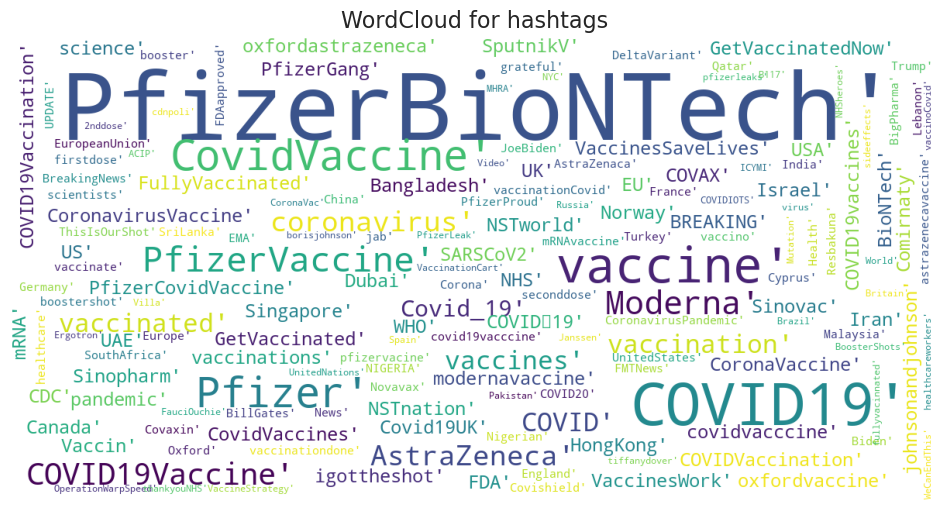

In [589]:
show_wordcloud(' '.join(hashtags))

### Step 4: Modelling with VADER

In [590]:
#Ctreate an instance of SentimentIntensityAnalyzer
sid = SIA()
df['sentiments'] = df['text'].apply(lambda x: sid.polarity_scores(' '.join(re.findall(r'\w+',x.lower()))))
df['Positive'] = df['sentiments'].apply(lambda x: x['pos']+1*(10**-6)) 
df['Neutral'] = df['sentiments'].apply(lambda x: x['neu']+1*(10**-6))
df['Negative'] = df['sentiments'].apply(lambda x: x['neg']+1*(10**-6))
df["polarity"] = df["sentiments"].apply(lambda x: "Positive" if x['compound'] > 0.1 else "Negative" if x['compound'] < -0.1 else "Neutral")
df.drop(columns=['sentiments'],inplace=True)

In [591]:
df

user_followers  user_verified  \
44             278080              1   
43              66224              1   
42                 14              0   
41               2035              0   
40                761              0   
...               ...            ...   
10963            1987              0   
10962            2301              0   
10961            2375              0   
10960             184              0   
10959             498              0   

                                                    text  \
44                  authorizes vaccine for emergency use   
43     trump announces rollout in less than  hours th...   
42                                                covid    
41              fact sheet for recipients and caregivers   
40     itthe only one which doesnhave any side effect...   
...                                                  ...   
10963  the expansion is valid for both moderna and pf...   
10962                                    and full report   
10961                                nothing to see here   
10960  the effects are hiding and not reporting autoa...   
10959                                      une objection   

                                                hashtags               source  \
44              ['FDA', 'PfizerBioNTech', 'coronavirus']      Twitter Web App   
43                                           ['vaccine']      Twitter Web App   
42     ['CovidVaccine', 'Pfizer', 'PfizerBioNTech', '...   Twitter for iPhone   
41                    ['PfizerBioNTech', 'CovidVaccine']      Twitter Web App   
40                                    ['PfizerBioNTech']      Twitter Web App   
...                                                  ...                  ...   
10963                                                NaN        Sprout Social   
10962                      ['Moderna', 'PfizerBioNTech']      Twitter Web App   
10961  ['Health', 'heartattack', 'myocarditis', 'peri...   Twitter for iPhone   
10960         ['PfizerBiontech', 'CovidVaccines', 'MSM']      Twitter Web App   
10959  ['PfizerBiontech', 'vaccination', 'pfizer', 'C...  Twitter for Android   

       retweets  favorites  year  month  day  Positive   Neutral  Negative  \
44            1          1  2020     12   12  0.000001  0.606001  0.394001   
43            0          2  2020     12   12  0.000001  1.000001  0.000001   
42            0          1  2020     12   12  0.000001  1.000001  0.000001   
41            0          0  2020     12   12  0.000001  1.000001  0.000001   
40            0          0  2020     12   12  0.000001  1.000001  0.000001   
...         ...        ...   ...    ...  ...       ...       ...       ...   
10963         0          0  2021     11   23  0.137001  0.863001  0.000001   
10962         0          0  2021     11   23  0.000001  1.000001  0.000001   
10961         0          0  2021     11   23  0.000001  1.000001  0.000001   
10960         0          0  2021     11   23  0.000001  0.833001  0.167001   
10959         0          0  2021     11   23  0.000001  1.000001  0.000001   

       polarity  
44     Negative  
43      Neutral  
42      Neutral  
41      Neutral  
40      Neutral  
...         ...  
10963  Positive  
10962   Neutral  
10961   Neutral  
10960  Negative  
10959   Neutral  

[11020 rows x 14 columns]

### correlation matrix

In [592]:
corr = df.corr()
corr

user_followers  user_verified  retweets  favorites      year  \
user_followers        1.000000       0.344215  0.076374   0.046989 -0.048524   
user_verified         0.344215       1.000000  0.145119   0.114995 -0.111766   
retweets              0.076374       0.145119  1.000000   0.608388 -0.022740   
favorites             0.046989       0.114995  0.608388   1.000000 -0.036454   
year                 -0.048524      -0.111766 -0.022740  -0.036454  1.000000   
month                 0.044695       0.072290  0.006303   0.004792 -0.766946   
day                   0.004583       0.008594  0.001549  -0.008043 -0.228278   
Positive             -0.013198      -0.045654 -0.014531   0.026149  0.012249   
Neutral               0.021875       0.057719  0.014881  -0.006893 -0.002669   
Negative             -0.012761      -0.020311  0.000556  -0.020134 -0.007114   

                   month       day  Positive   Neutral  Negative  
user_followers  0.044695  0.004583 -0.013198  0.021875 -0.012761  
user_verified   0.072290  0.008594 -0.045654  0.057719 -0.020311  
retweets        0.006303  0.001549 -0.014531  0.014881  0.000556  
favorites       0.004792 -0.008043  0.026149 -0.006893 -0.020134  
year           -0.766946 -0.228278  0.012249 -0.002669 -0.007114  
month           1.000000  0.207043 -0.021702  0.025197 -0.020868  
day             0.207043  1.000000  0.017879 -0.014685 -0.003438  
Positive       -0.021702  0.017879  1.000000 -0.743592 -0.138057  
Neutral         0.025197 -0.014685 -0.743592  1.000000 -0.416918  
Negative       -0.020868 -0.003438 -0.138057 -0.416918  1.000000

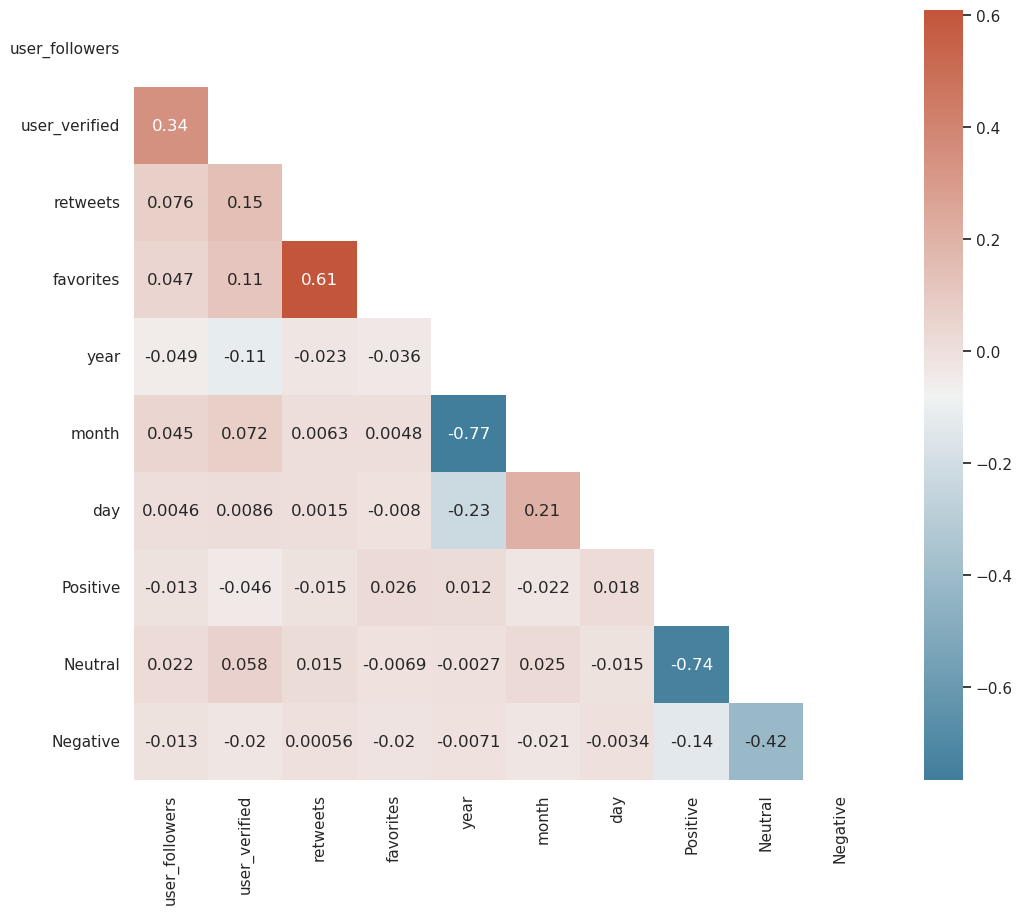

In [593]:
# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(12, 10))

# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap);

### Positive and negative tweet Bar plots

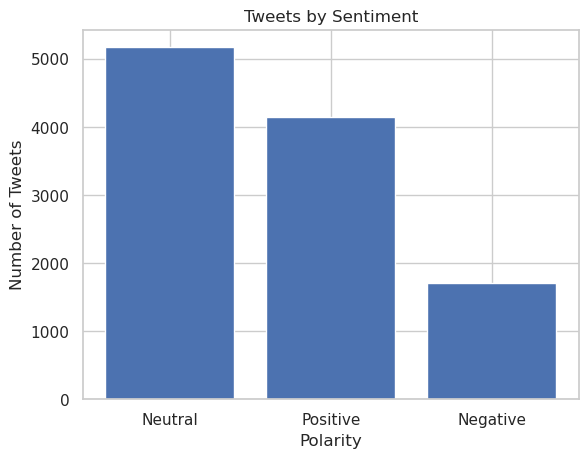

In [594]:
Count_sentiments = df['polarity'].value_counts()
plt.bar(Count_sentiments.index, Count_sentiments.values)
plt.xlabel('Polarity')
plt.ylabel('Number of Tweets')
plt.title('Tweets by Sentiment')
plt.show()

### Step 5: Data Visualizations

### Data visualization of frequency of tweets per day

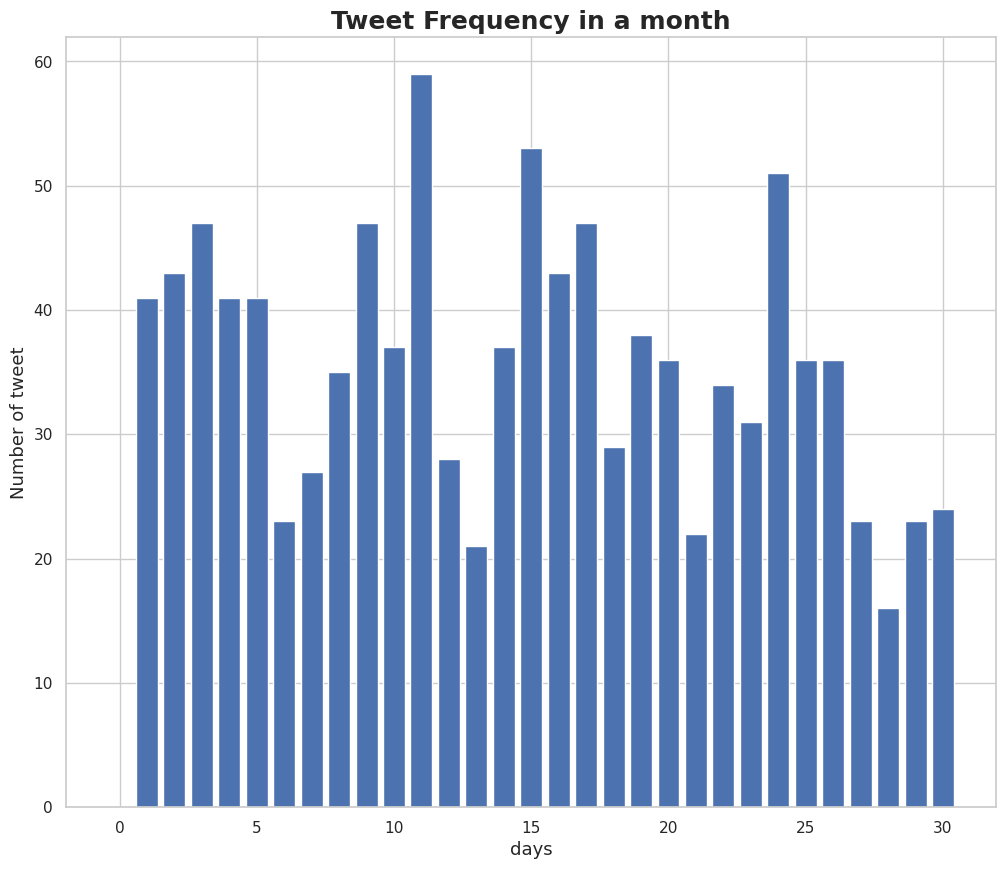

In [596]:
import random
random.seed(0)
x = df.loc[(df['month'] == 3) & (df['year'] == 2021), 'day']
inter = [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5, 12.5, 
         13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5, 22.5, 23.5, 24.5,
         25.5, 26.5, 27.5, 28.5, 29.5, 30.5]
f = plt.figure(figsize=(12, 10))
plt.hist(x, bins=inter, rwidth=0.8)  
plt.xlabel('days',fontsize = 13)
plt.ylabel('Number of tweet', fontsize = 13)
plt.title("Tweet Frequency in a month", fontsize = 18,fontweight='bold')
plt.show()

### Average of feelings by month

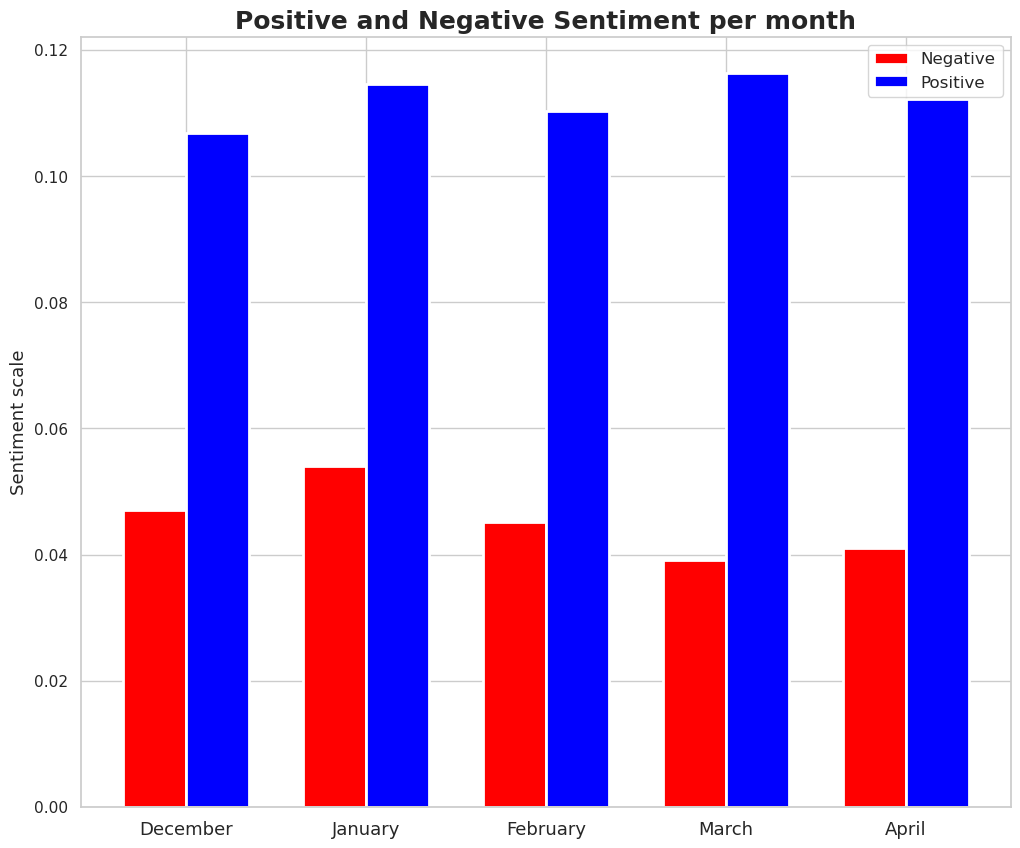

In [598]:
Mean_sentiment_Negative = [0]*5
Mean_sentiment_Positive = [0]*5
for i in range (0,5):
  Mean_sentiment_Positive[i] = df.loc[((df['month'] == i) & (df['year'] == 2021)) | ((df['month'] == i+12) & (df['year'] == 2020)) , 'Positive'].mean()
  Mean_sentiment_Negative[i] = df.loc[((df['month'] == i) & (df['year'] == 2021)) | ((df['month'] == i+12) & (df['year'] == 2020)) , 'Negative'].mean()

bar_width = 0.35 
months = ['December', 'January', 'February', 'March', 'April']
x1 = range(len(months)) 
x2 = [i + bar_width for i in x1]
f = plt.figure(figsize=(12, 10))
plt.ylabel('Sentiment scale',fontsize = 13)
plt.title("Positive and Negative Sentiment per month",fontsize = 18,fontweight='bold')
plt.bar(x1,Mean_sentiment_Negative,width=0.35, color = 'red', linewidth = 2)
plt.bar(x2, Mean_sentiment_Positive,width=0.35, color = 'blue', linewidth = 2)
plt.xticks([r + bar_width / 2 for r in range(len(x1))],months,fontsize = 13)
plt.legend(['Negative','Positive'],fontsize = 12)
plt.show()

We can observe that the number of negative tweets is clearly higher in January while the number of positive tweets does not vary according to the month.

We can wonder what happens in January and when exactly the number of negative tweets has increased.

### Average negative feelings per day during January

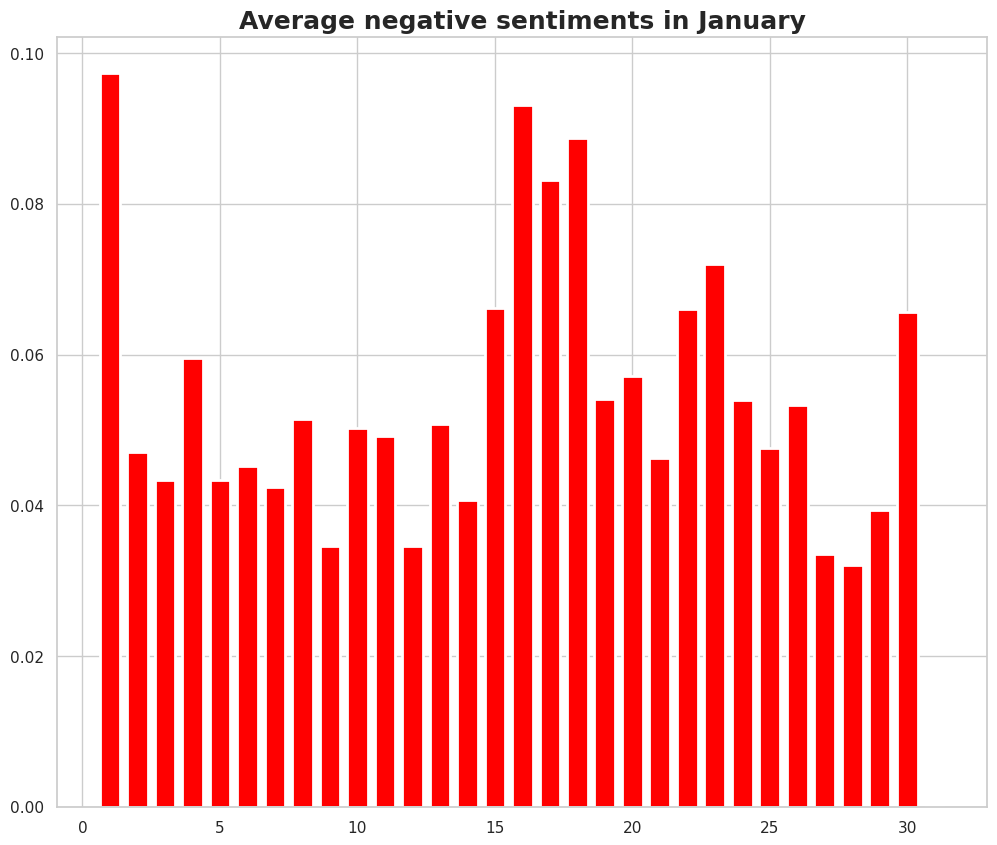

In [599]:
Mean_sentiment_Negative_daily = [0]*31
for i in range (1,31):
  Mean_sentiment_Negative_daily[i-1] = df.loc[((df['month'] == 1) & (df['year'] == 2021) & (df['day'] == i)) , 'Negative'].mean()
x1 = range(1,32) 
f = plt.figure(figsize=(12, 10))
plt.title("Average negative sentiments in January",fontsize = 18,fontweight='bold')
plt.bar(x1,Mean_sentiment_Negative_daily,width=0.75, color = 'red', linewidth = 2)
plt.show()

We can observe that between January 10th and 25th, the number of negative tweets has exploded. It corresponds to the beginning of vaccination around the world.

### Users based on Followers/Popularity

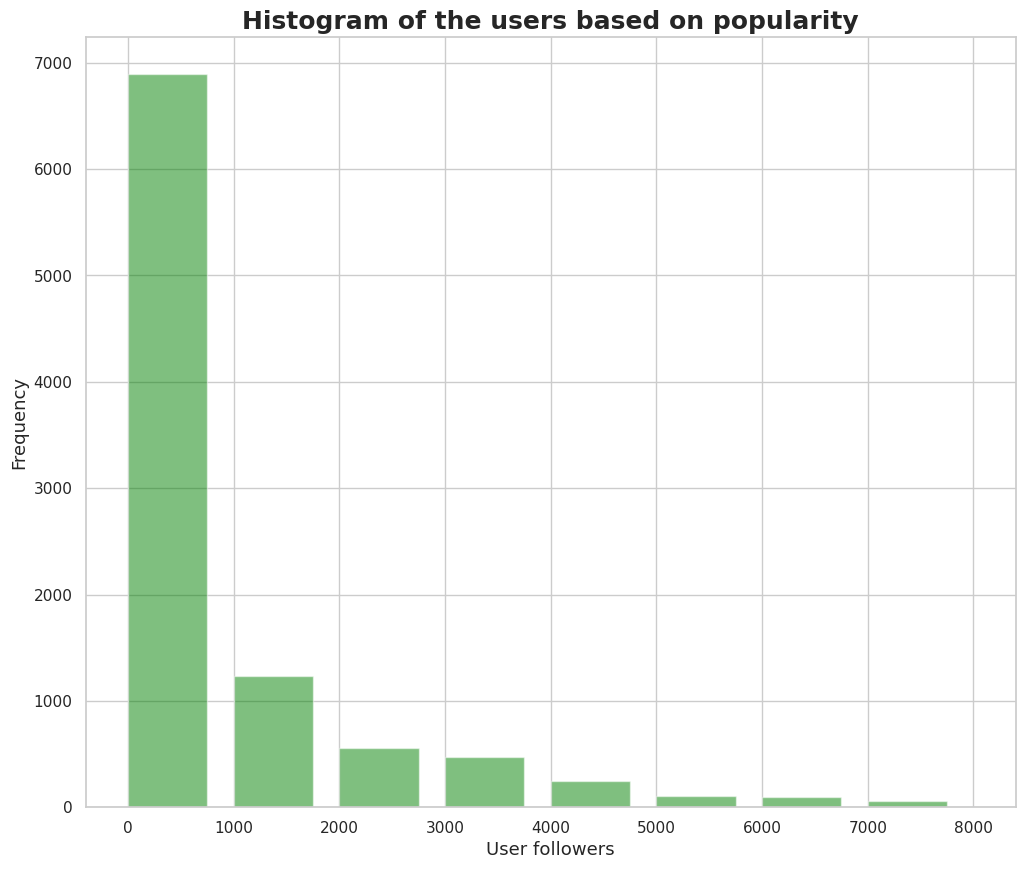

In [600]:
f = plt.figure(figsize=(12, 10))

plt.hist(df['user_followers'],bins=[0,1000,2000,3000,4000,5000,6000,7000,8000], width = 750, alpha=0.5, color='green')
plt.xticks([0,1000,2000,3000,4000,5000,6000,7000,8000])
plt.title('Histogram of the users based on popularity',fontsize = 18, fontweight = 'bold')
plt.xlabel('User followers', fontsize = 13)
plt.ylabel('Frequency', fontsize = 13)
plt.show()

most people don't have many followers (less than one thousand user_followers)

### Histogram on the average feelings based on the popularity

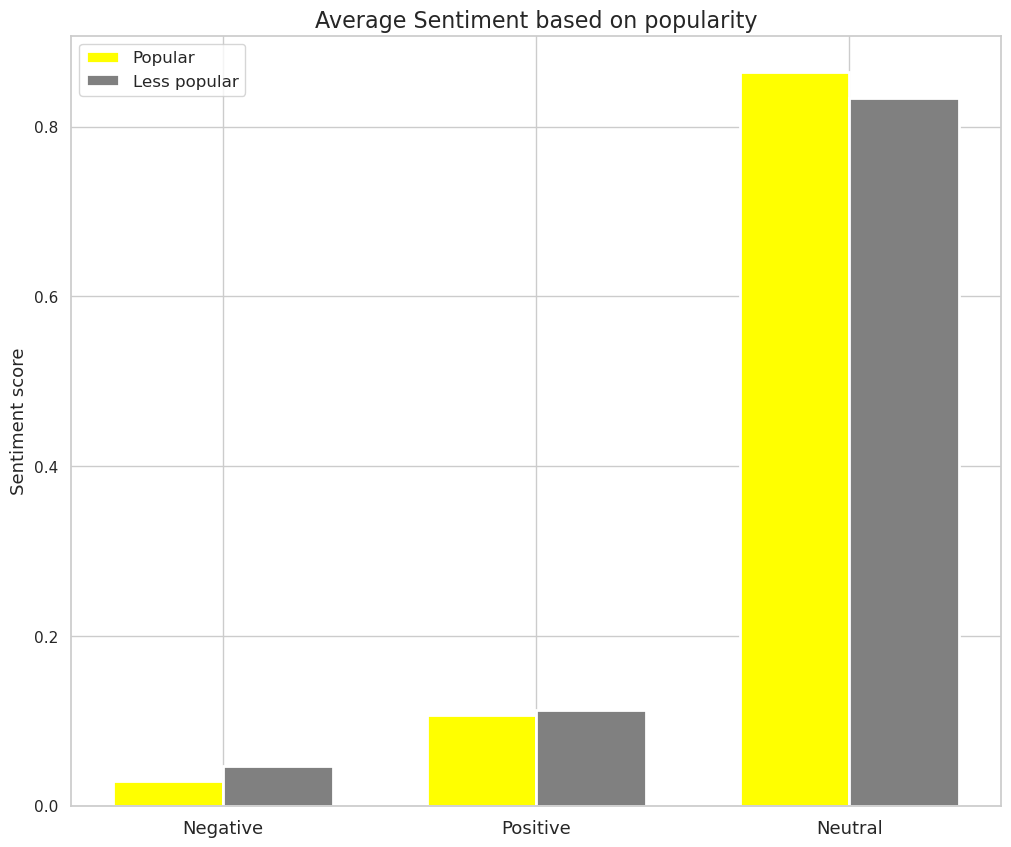

In [601]:
List_comparative_popular = [0]*3
List_comparative_none_popular = [0]*3

List_comparative_popular[0] = df.loc[(df['user_followers'] > 100000) ,'Negative'].mean()
List_comparative_none_popular[0] = df.loc[(df['user_followers'] < 10000) ,'Negative'].mean()
List_comparative_popular[1] = df.loc[(df['user_followers'] > 100000) ,'Positive'].mean()
List_comparative_none_popular[1] = df.loc[(df['user_followers'] < 10000) ,'Positive'].mean()
List_comparative_popular[2] = df.loc[(df['user_followers'] > 100000) ,'Neutral'].mean()
List_comparative_none_popular[2] = df.loc[(df['user_followers'] < 10000) ,'Neutral'].mean()

bar_width = 0.35 
names = ['Negative','Positive','Neutral']
x1 = range(len(names)) 
x2 = [i + bar_width for i in x1]
f = plt.figure(figsize=(12, 10))
plt.ylabel('Sentiment score',fontsize = 13)
plt.title("Average Sentiment based on popularity",fontsize = 16)
plt.bar(x1,List_comparative_popular,width=0.35, color = 'yellow', linewidth = 2)
plt.bar(x2,List_comparative_none_popular ,width=0.35, color = 'grey', linewidth = 2)
plt.xticks([r + bar_width / 2 for r in range(len(x1))],names,fontsize = 13)
plt.legend(['Popular','Less popular'], fontsize = 12)
plt.show()

In general, Popular user tweet less positive and negative tweet than unpopular user. But, Popular user tweet more neutral tweet than unpopular user.

Perhaps because popular user make more attention about what they write

### Histogram of the average feelings based on the popularity for January

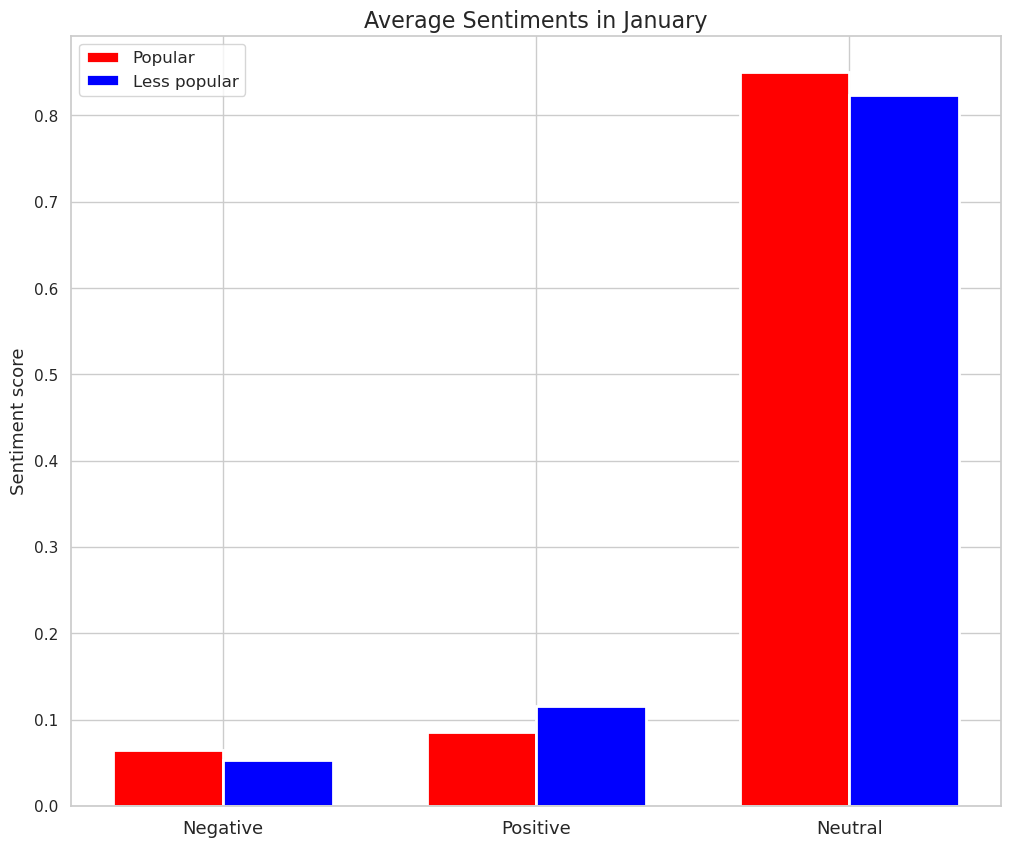

In [602]:
List_comparative_popular_january = [0]*3
List_comparative_none_popular_january = [0]*3

List_comparative_popular_january[0] = df.loc[(df['user_followers'] > 10000) & (df['month'] == 1) & (df['year'] == 2021),'Negative'].mean()
List_comparative_none_popular_january[0] = df.loc[(df['user_followers'] < 10000) & (df['month'] == 1) & (df['year'] == 2021),'Negative'].mean()
List_comparative_popular_january[1] = df.loc[(df['user_followers'] > 10000) & (df['month'] == 1) & (df['year'] == 2021),'Positive'].mean()
List_comparative_none_popular_january[1] = df.loc[(df['user_followers'] < 100000) & (df['month'] == 1) & (df['year'] == 2021),'Positive'].mean()
List_comparative_popular_january[2] = df.loc[(df['user_followers'] > 10000) & (df['month'] == 1) & (df['year'] == 2021),'Neutral'].mean()
List_comparative_none_popular_january[2] = df.loc[(df['user_followers'] < 10000) & (df['month'] == 1) & (df['year'] == 2021),'Neutral'].mean()

bar_width = 0.35 
names = ['Negative','Positive','Neutral']
x1 = range(len(names)) 
x2 = [i + bar_width for i in x1]
f = plt.figure(figsize=(12, 10))
plt.ylabel('Sentiment score',fontsize = 13)
plt.title("Average Sentiments in January",fontsize = 16)
plt.bar(x1,List_comparative_popular_january,width=0.35, color = 'red', linewidth = 2)
plt.bar(x2,List_comparative_none_popular_january ,width=0.35, color = 'blue', linewidth = 2)
plt.xticks([r + bar_width / 2 for r in range(len(x1))],names,fontsize = 13)
plt.legend(['Popular','Less popular'], fontsize = 12)
plt.show()

We would like to know if twitter tends to censure the accounts who provide negative opinions on the Pfizer.

### Pie chart showing the distrubtion of verified and unverified users

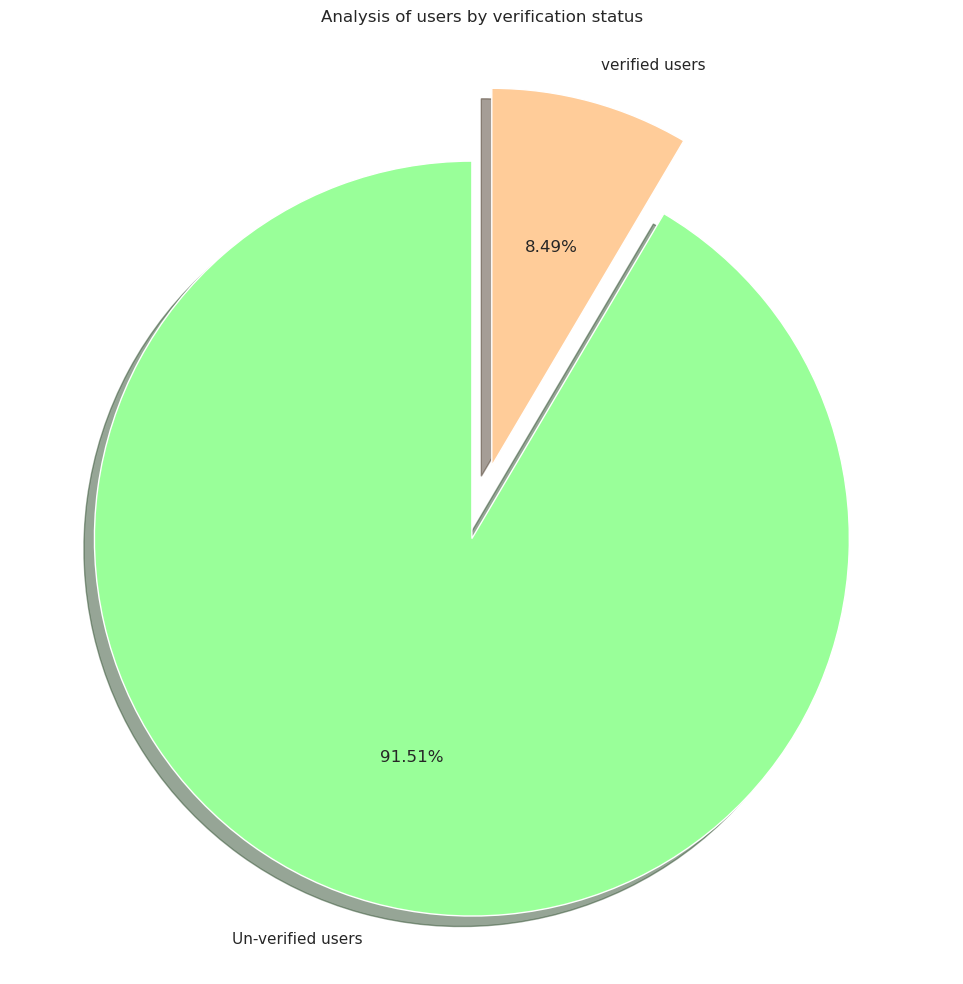

In [606]:
data = df['user_verified'].value_counts()
labels = ['Un-verified users', 'verified users']
colors = ['#99ff99','#ffcc99']
explode = (0.1, 0.1)
figure = plt.figure(figsize=(15,10))
plt.pie(data, labels=labels,
        explode = explode, colors = colors, shadow = True, startangle = 90, autopct='%1.2f%%')

plt.title('Analysis of users by verification status')
plt.tight_layout()
plt.show()

most tweets are from unverified users. The verified users represent a small part of the sample

### Average negative feelings per account verification status

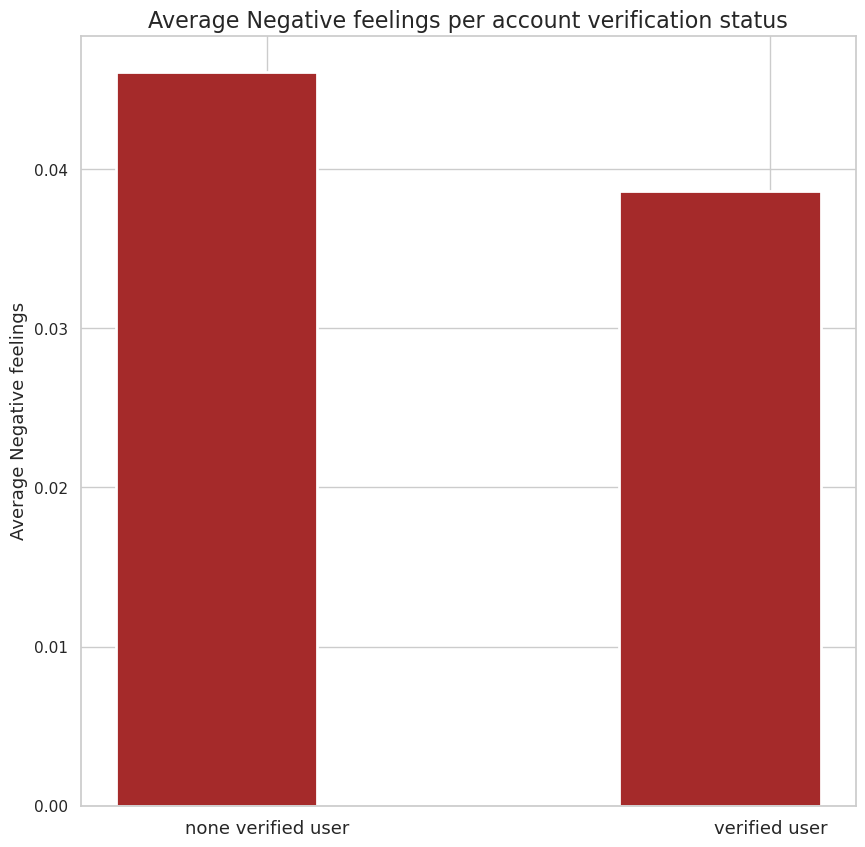

In [192]:
user_follower = [0]*2

user_follower[1] = df.loc[(df['user_verified'] == 1),'Negative'].mean()
user_follower[0] = df.loc[(df['user_verified'] == 0),'Negative'].mean()

bar_width = 0.2
labels = ['none verified user','verified user']
x1 = range(len(labels)) 
f = plt.figure(figsize=(10, 10))
plt.ylabel('Average Negative feelings',fontsize = 13)
plt.title("Average Negative feelings per account verification status",fontsize = 16)
plt.bar(x1,user_follower,width=0.4, color = 'brown', linewidth = 2)

plt.xticks([r + bar_width / 2 for r in range(len(x1))],labels,fontsize = 13)
plt.show()

In [193]:
percentage = ((user_follower[0] - user_follower[1])/user_follower[0])*100
print("User verified tends to have a good view on Pfizer %f more than none user verified" % (percentage))

User verified tends to have a good view on Pfizer 16.199516 more than none user verified


That means that we needs to be careful about our interpretation because twitter may filter the users.

### Generating Word cloud for the positive tweets

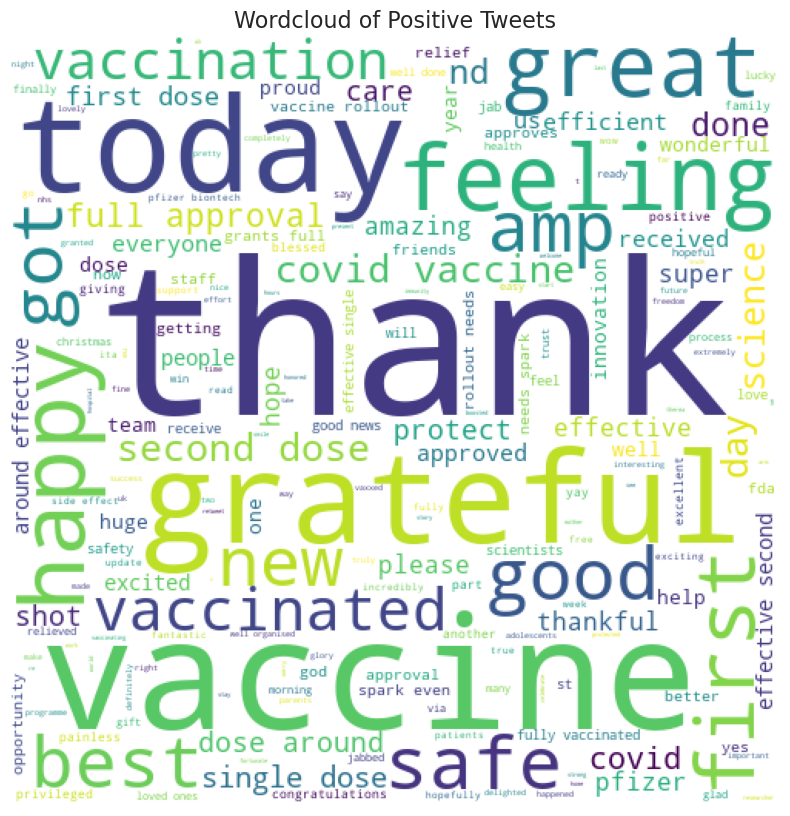

In [608]:
Word_Positive = df[df['Positive'].between(0.4,1)]
Word_Positive = ' '.join(Word_Positive.text)

positive = WordCloud(width=500,height=500,background_color='white').generate(Word_Positive)
f = plt.figure(figsize=(10, 10))
plt.title('Wordcloud of Positive Tweets',fontsize=16)
plt.imshow(positive)
plt.axis('off')
plt.show()

### Generating Word cloud for the negative tweets

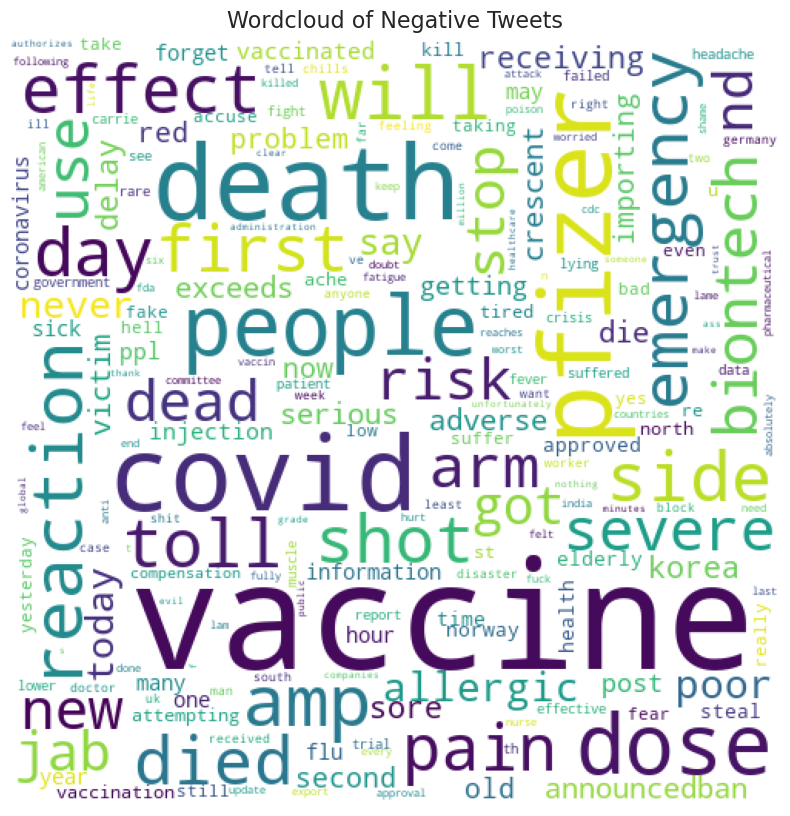

In [609]:
Word_Negative = df[df['Negative'].between(0.25,1)]
Word_Negative = ' '.join(Word_Negative.text)

negative = WordCloud(width=500,height=500,collocations = False,background_color='white').generate(Word_Negative)
f = plt.figure(figsize=(10, 10))
plt.title('Wordcloud of Negative Tweets',fontsize=16)
plt.imshow(negative)
plt.axis('off')
plt.show()

We have taken Pfizer in order to simplifie the problem
Now, we are going to analyse for all vaccination in order to study the different point of view on different vaccination. we are going to import a different dataset and repeat the same data preprocessing.

### Using TextBlob for Sentimental Analysis

### Import libraries

In [368]:
#Data Manipulation
import pandas as pd
import numpy as np

#Data Preprocessing
import neattext.functions as nfx
import random
import nltk
import string
import re

from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from nltk.util import ngrams
from nltk import word_tokenize

#Sentimental Analysis
from textblob import TextBlob
from collections import Counter

#Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

### Import Dataset

In [369]:
df2 = pd.read_csv("vaccination_tweets.csv")
df2.head(10)

id             user_name                user_location  \
0  1340539111971516416            Rachel Roh    La Crescenta-Montrose, CA   
1  1338158543359250433           Albert Fong            San Francisco, CA   
2  1337858199140118533              eli🇱🇹🇪🇺👌                     Your Bed   
3  1337855739918835717         Charles Adler       Vancouver, BC - Canada   
4  1337854064604966912  Citizen News Channel                          NaN   
5  1337852648389832708                   Dee          Birmingham, England   
6  1337851215875608579     Gunther Fehlinger  Austria, Ukraine and Kosovo   
7  1337850832256176136   Dr.Krutika Kuppalli                          NaN   
8  1337850023531347969           Erin Despas                          NaN   
9  1337842295857623042          Ch.Amjad Ali                    Islamabad   

                                    user_description         user_created  \
0  Aggregator of Asian American news; scanning di...  2009-04-08 17:52:46   
1  Marketing dude, tech geek, heavy metal & '80s ...  2009-09-21 15:27:30   
2                                     heil, hydra 🖐☺  2020-06-25 23:30:28   
3  Hosting "CharlesAdlerTonight" Global News Radi...  2008-09-10 11:28:53   
4  Citizen News Channel bringing you an alternati...  2020-04-23 17:58:42   
5  Gastroenterology trainee, Clinical Research Fe...  2020-01-26 21:43:12   
6  End North Stream 2 now - the pipeline of corru...  2013-06-10 17:49:22   
7  ID, Global Health, VHF, Pandemic Prep, Emergin...  2019-03-25 04:14:29   
8  Designing&selling on Teespring. Like 90s Disne...  2009-10-30 17:53:54   
9  #ProudPakistani #LovePakArmy #PMIK @insafiansp...  2012-11-12 04:18:12   

   user_followers  user_friends  user_favourites  user_verified  \
0             405          1692             3247          False   
1             834           666              178          False   
2              10            88              155          False   
3           49165          3933            21853           True   
4             152           580             1473          False   
5             105           108              106          False   
6            2731          5001            69344          False   
7           21924           593             7815           True   
8             887          1515             9639          False   
9             671          2368            20469          False   

                  date                                               text  \
0  2020-12-20 06:06:44  Same folks said daikon paste could treat a cyt...   
1  2020-12-13 16:27:13  While the world has been on the wrong side of ...   
2  2020-12-12 20:33:45  #coronavirus #SputnikV #AstraZeneca #PfizerBio...   
3  2020-12-12 20:23:59  Facts are immutable, Senator, even when you're...   
4  2020-12-12 20:17:19  Explain to me again why we need a vaccine @Bor...   
5  2020-12-12 20:11:42  Does anyone have any useful advice/guidance fo...   
6  2020-12-12 20:06:00  it is a bit sad to claim the fame for success ...   
7  2020-12-12 20:04:29  There have not been many bright days in 2020 b...   
8  2020-12-12 20:01:16  Covid vaccine; You getting it?\n\n #CovidVacci...   
9  2020-12-12 19:30:33  #CovidVaccine \n\nStates will start getting #C...   

                                            hashtags               source  \
0                                 ['PfizerBioNTech']  Twitter for Android   
1                                                NaN      Twitter Web App   
2  ['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...  Twitter for Android   
3                                                NaN      Twitter Web App   
4     ['whereareallthesickpeople', 'PfizerBioNTech']   Twitter for iPhone   
5                                                NaN   Twitter for iPhone   
6                                    ['vaccination']      Twitter Web App   
7                    ['BidenHarris', 'Election2020']   Twitter for iPhone   
8  ['CovidVaccine', 'covid19', 'PfizerBioNTec

### Text Analysis of tweets

In [370]:
import neattext.functions as nfx

### Remove handles, hashtags, urls, emojis, special characters

In [371]:
df2['text'].apply(nfx.extract_hashtags)

0                                        [#PfizerBioNTech]
1                                                       []
2        [#coronavirus, #SputnikV, #AstraZeneca, #Pfize...
3                                                       []
4            [#whereareallthesickpeople, #PfizerBioNTech…]
                               ...                        
11015                                                   []
11016                                    [#PfizerBioNTech]
11017                                                   []
11018               [#PfizerBioNTech, #Paxlovid, #COVID19]
11019                                                   []
Name: text, Length: 11020, dtype: object

In [372]:
#Comparing near similarity of both hashtags column and extractedd hashtags using neattext function
df2['extracted_hashtags'] = df2['text'].apply(nfx.extract_hashtags)
df2[['extracted_hashtags', 'hashtags']]

extracted_hashtags  \
0                                      [#PfizerBioNTech]   
1                                                     []   
2      [#coronavirus, #SputnikV, #AstraZeneca, #Pfize...   
3                                                     []   
4          [#whereareallthesickpeople, #PfizerBioNTech…]   
...                                                  ...   
11015                                                 []   
11016                                  [#PfizerBioNTech]   
11017                                                 []   
11018             [#PfizerBioNTech, #Paxlovid, #COVID19]   
11019                                                 []   

                                                hashtags  
0                                     ['PfizerBioNTech']  
1                                                    NaN  
2      ['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...  
3                                                    NaN  
4         ['whereareallthesickpeople', 'PfizerBioNTech']  
...                                                  ...  
11015                                                NaN  
11016                                 ['PfizerBioNTech']  
11017                                                NaN  
11018          ['PfizerBioNTech', 'Paxlovid', 'COVID19']  
11019                                                NaN  

[11020 rows x 2 columns]

In [380]:
#Cleaning the text by removing hashtags because we have a new column, extracted hashtags already created
df2['clean_tweet'] = df2['text'].apply(nfx.remove_hashtags)

In [381]:
df2['clean_tweet']

0        Same folks said daikon paste could treat a cyt...
1        While the world has been on the wrong side of ...
2                    Russian vaccine is created to last...
3        Facts are immutable, Senator, even when you're...
4        Explain to me again why we need a vaccine @Bor...
                               ...                        
11015    The number of Covid-19 cases today, 17 Novembe...
11016                                      First dose ✅\n 
11017    The number of Covid-19 cases today, 16 Novembe...
11018      has developed new pill   that increased the ...
11019    The number of Covid-19 cases today, 15 Novembe...
Name: clean_tweet, Length: 11020, dtype: object

In [382]:
df2['clean_tweet'] = df2['clean_tweet'].apply(lambda x: nfx.remove_userhandles(x)) #drop urls

In [383]:
df2['clean_tweet'] = df2['text'].apply(nfx.remove_multiple_spaces) #drop spaces

In [384]:
df2['clean_tweet'] = df2['text'].apply(nfx.remove_urls) #drop urls

In [385]:
df2['clean_tweet'] = df2['text'].apply(nfx.remove_puncts) #drop punctuations

In [386]:
df2['clean_tweet']

0        Same folks said daikon paste could treat a cyt...
1        While the world has been on the wrong side of ...
2        #coronavirus #SputnikV #AstraZeneca #PfizerBio...
3        Facts are immutable Senator even when youre no...
4        Explain to me again why we need a vaccine @Bor...
                               ...                        
11015    The number of Covid19 cases today 17 November ...
11016                        First dose ✅\n#PfizerBioNTech
11017    The number of Covid19 cases today 16 November ...
11018    #PfizerBioNTech has developed new pill #Paxlov...
11019    The number of Covid19 cases today 15 November ...
Name: clean_tweet, Length: 11020, dtype: object

In [387]:
df2['clean_tweet'] = df2['clean_tweet'].apply(nfx.remove_hashtags)
df2['clean_tweet']

0        Same folks said daikon paste could treat a cyt...
1        While the world has been on the wrong side of ...
2                    Russian vaccine is created to last...
3        Facts are immutable Senator even when youre no...
4        Explain to me again why we need a vaccine @Bor...
                               ...                        
11015    The number of Covid19 cases today 17 November ...
11016                                      First dose ✅\n 
11017    The number of Covid19 cases today 16 November ...
11018      has developed new pill   that increased the ...
11019    The number of Covid19 cases today 15 November ...
Name: clean_tweet, Length: 11020, dtype: object

In [469]:
df2['clean_tweet'].head(20)

0     Same folks said daikon paste could treat a cyt...
1     While the world has been on the wrong side of ...
2                 Russian vaccine is created to last...
3     Facts are immutable Senator even when youre no...
4     Explain to me again why we need a vaccine @Bor...
5     Does anyone have any useful advice/guidance fo...
6     it is a bit sad to claim the fame for success ...
7     There have not been many bright days in 2020 b...
8              Covid vaccine You getting it\n\n        
9       \n\nStates will start getting   Monday   say...
10    while deaths are closing in on the 300000 mark...
11    @cnnbrk                   Best wishes to the U...
12    The agency also released new information for h...
13    For all the women and healthcare providers who...
14    Expect 145 sites across all the states to rece...
15    Trump announces   rollout in less than 24 hour...
16    UPDATED:   amp      Part Two\n\n        https:...
17    Coronavirus: Iran reports 8201 new cases 2

### Textblob Sentiment Analysis

In [388]:
from textblob import TextBlob

In [389]:
def get_sentiment(text):
    blob = TextBlob(text) 
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
    if sentiment_polarity > 0:
        sentiment_label = 'Positive'
    elif sentiment_polarity < 0:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
    result = {'polarity':sentiment_polarity,
             'subjectivity':sentiment_subjectivity,
             'sentiment': sentiment_label}
    return result

In [390]:
df2['sentiment_results'] = df2['clean_tweet'].apply(get_sentiment)

In [391]:
df2['sentiment_results']

0        {'polarity': 0.0, 'subjectivity': 0.125, 'sent...
1        {'polarity': -0.5, 'subjectivity': 0.9, 'senti...
2        {'polarity': 0.0, 'subjectivity': 0.0333333333...
3        {'polarity': -0.05, 'subjectivity': 0.55, 'sen...
4        {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
                               ...                        
11015    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
11016    {'polarity': 0.25, 'subjectivity': 0.333333333...
11017    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
11018    {'polarity': -0.12121212121212122, 'subjectivi...
11019    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
Name: sentiment_results, Length: 11020, dtype: object

In [392]:
df2 = df2.join(pd.json_normalize(df2['sentiment_results']))

In [393]:
df2.head(5)

id             user_name              user_location  \
0  1340539111971516416            Rachel Roh  La Crescenta-Montrose, CA   
1  1338158543359250433           Albert Fong          San Francisco, CA   
2  1337858199140118533              eli🇱🇹🇪🇺👌                   Your Bed   
3  1337855739918835717         Charles Adler     Vancouver, BC - Canada   
4  1337854064604966912  Citizen News Channel                        NaN   

                                    user_description         user_created  \
0  Aggregator of Asian American news; scanning di...  2009-04-08 17:52:46   
1  Marketing dude, tech geek, heavy metal & '80s ...  2009-09-21 15:27:30   
2                                     heil, hydra 🖐☺  2020-06-25 23:30:28   
3  Hosting "CharlesAdlerTonight" Global News Radi...  2008-09-10 11:28:53   
4  Citizen News Channel bringing you an alternati...  2020-04-23 17:58:42   

   user_followers  user_friends  user_favourites  user_verified  \
0             405          1692             3247          False   
1             834           666              178          False   
2              10            88              155          False   
3           49165          3933            21853           True   
4             152           580             1473          False   

                  date  ...               source retweets favorites  \
0  2020-12-20 06:06:44  ...  Twitter for Android        0         0   
1  2020-12-13 16:27:13  ...      Twitter Web App        1         1   
2  2020-12-12 20:33:45  ...  Twitter for Android        0         0   
3  2020-12-12 20:23:59  ...      Twitter Web App      446      2129   
4  2020-12-12 20:17:19  ...   Twitter for iPhone        0         0   

   is_retweet                                 extracted_hashtags  \
0       False                                  [#PfizerBioNTech]   
1       False                                                 []   
2       False  [#coronavirus, #SputnikV, #AstraZeneca, #Pfize...   
3       False                                                 []   
4       False      [#whereareallthesickpeople, #PfizerBioNTech…]   

                                         clean_tweet  \
0  Same folks said daikon paste could treat a cyt...   
1  While the world has been on the wrong side of ...   
2              Russian vaccine is created to last...   
3  Facts are immutable Senator even when youre no...   
4  Explain to me again why we need a vaccine @Bor...   

                                   sentiment_results polarity subjectivity  \
0  {'polarity': 0.0, 'subjectivity': 0.125, 'sent...     0.00     0.125000   
1  {'polarity': -0.5, 'subjectivity': 0.9, 'senti...    -0.50     0.900000   
2  {'polarity': 0.0, 'subjectivity': 0.0333333333...     0.00     0.033333   
3  {'polarity': -0.05, 'subjectivity': 0.55, 'sen...    -0.05     0.550000   
4  {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...     0.00     0.000000   

   sentiment  
0    Neutral  
1   Negative  
2    Neutral  
3   Negative  
4    Neutral  

[5 rows x 22 columns]

In [394]:
df2['sentiment'].value_counts()

Neutral     5245
Positive    4638
Negative    1137
Name: sentiment, dtype: int64

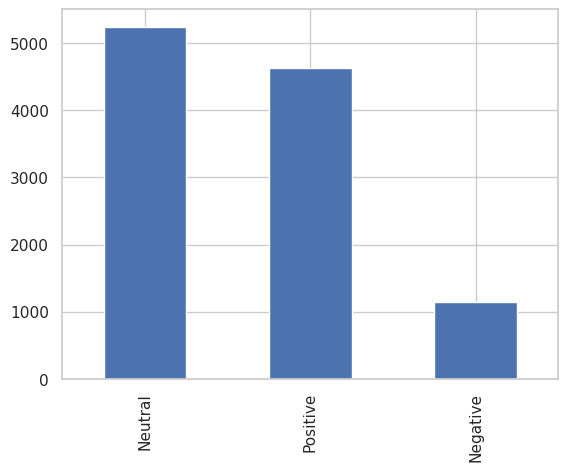

In [395]:
df2['sentiment'].value_counts().plot(kind='bar'); #Sentiments Bar Plot

In [396]:
#Keyword Extractions for Textblob

In [397]:
pos_tweet = df2[df2['sentiment'] == 'Positive']['clean_tweet']
neg_tweet = df2[df2['sentiment'] == 'Negative']['clean_tweet']
neu_tweet = df2[df2['sentiment'] == 'Neutral']['clean_tweet']

In [398]:
#Remove stopwords and tokenize
pos_tweet_list =pos_tweet.apply(nfx.remove_stopwords).tolist()
neg_tweet_list =pos_tweet.apply(nfx.remove_stopwords).tolist()
neu_tweet_list =pos_tweet.apply(nfx.remove_stopwords).tolist()

In [399]:
for line in pos_tweet_list:
    print(line)
    for token in line.split():
        print(token)

useful advice/guidance COVID vaccine safe whilst breastfeeding… https://tco/EifsyQoeKN
useful
advice/guidance
COVID
vaccine
safe
whilst
breastfeeding…
https://tco/EifsyQoeKN
bright days 2020 best 1 winning https://tco/77u4f8XXfx
bright
days
2020
best
1
winning
https://tco/77u4f8XXfx
deaths closing 300000 mark millions people wait U… https://tco/uQ3A2f7SVP
deaths
closing
300000
mark
millions
people
wait
U…
https://tco/uQ3A2f7SVP
@cnnbrk Best wishes US… https://tco/9xWmfU3LZj
@cnnbrk
Best
wishes
US…
https://tco/9xWmfU3LZj
agency released new information health care providers patients shipped millions d… https://tco/sG6BtD7jD9
agency
released
new
information
health
care
providers
patients
shipped
millions
d…
https://tco/sG6BtD7jD9
Trump announces rollout 24 hours Americans vaccinated against… https://tco/2FzQSMnhoY
Trump
announces
rollout
24
hours
Americans
vaccinated
against…
https://tco/2FzQSMnhoY
Coronavirus: Iran reports 8201 new cases 221 deaths 24 hours https://tco/mwDNAdmb7F
Corona

In [400]:
pos_tokens = [token for line in pos_tweet_list for token in line.split()]
neg_tokens = [token for line in neg_tweet_list for token in line.split()]
neu_tokens = [token for line in neu_tweet_list for token in line.split()]

In [401]:
pos_tokens

['useful',
 'advice/guidance',
 'COVID',
 'vaccine',
 'safe',
 'whilst',
 'breastfeeding…',
 'https://tco/EifsyQoeKN',
 'bright',
 'days',
 '2020',
 'best',
 '1',
 'winning',
 'https://tco/77u4f8XXfx',
 'deaths',
 'closing',
 '300000',
 'mark',
 'millions',
 'people',
 'wait',
 'U…',
 'https://tco/uQ3A2f7SVP',
 '@cnnbrk',
 'Best',
 'wishes',
 'US…',
 'https://tco/9xWmfU3LZj',
 'agency',
 'released',
 'new',
 'information',
 'health',
 'care',
 'providers',
 'patients',
 'shipped',
 'millions',
 'd…',
 'https://tco/sG6BtD7jD9',
 'Trump',
 'announces',
 'rollout',
 '24',
 'hours',
 'Americans',
 'vaccinated',
 'against…',
 'https://tco/2FzQSMnhoY',
 'Coronavirus:',
 'Iran',
 'reports',
 '8201',
 'new',
 'cases',
 '221',
 'deaths',
 '24',
 'hours',
 'https://tco/mwDNAdmb7F',
 'paid',
 'approve',
 'sudden',
 'money',
 'makes',
 'world',
 'https://tco/GT9qVVNbKj',
 'Trump',
 'announces',
 'rollout',
 '24',
 'hours',
 'Americans',
 'vaccinated',
 'against…',
 'https://tco/P9esXr3zpS',
 'Pres

### Keyword Analysis

In [402]:
from collections import Counter

In [403]:
def get_tokens(docx, num=30):
    word_tokens = Counter(docx)
    most_common = word_tokens.most_common(num)
    result = dict(most_common)
    return(result)

In [404]:
get_tokens(neg_tokens)

{'vaccine': 1355,
 'dose': 748,
 'today': 349,
 'Pfizer': 278,
 'got': 273,
 'COVID19': 233,
 'effective': 215,
 'amp': 210,
 'received': 209,
 'vaccines': 203,
 'doses': 184,
 'shot': 182,
 'new': 177,
 'second': 177,
 'people': 175,
 'vaccinated': 174,
 'vaccination': 163,
 'Vaccine': 163,
 'jab': 149,
 'Thanks': 147,
 '2nd': 147,
 'Got': 138,
 'good': 137,
 'Covid19': 136,
 'Thank': 132,
 '💉': 131,
 'day': 118,
 'the…': 109,
 '1st': 107,
 '2': 105}

In [405]:
most_common_positive_words = get_tokens(pos_tokens)
most_common_negative_words = get_tokens(neg_tokens)
most_common_neutral_words = get_tokens(neu_tokens)

In [406]:
#Create dataframe of the words
pos_df = pd.DataFrame(most_common_positive_words.items(), columns = ['words', 'counts'])
neg_df = pd.DataFrame(most_common_negative_words.items(), columns = ['words', 'counts'])
neu_df = pd.DataFrame(most_common_neutral_words.items(), columns = ['words', 'counts'])

In [407]:
pos_df

words  counts
0       vaccine    1355
1          dose     748
2         today     349
3        Pfizer     278
4           got     273
5       COVID19     233
6     effective     215
7           amp     210
8      received     209
9      vaccines     203
10        doses     184
11         shot     182
12          new     177
13       second     177
14       people     175
15   vaccinated     174
16  vaccination     163
17      Vaccine     163
18          jab     149
19       Thanks     147
20          2nd     147
21          Got     138
22         good     137
23      Covid19     136
24        Thank     132
25            💉     131
26          day     118
27         the…     109
28          1st     107
29            2     105

In [408]:
neu_df

words  counts
0       vaccine    1355
1          dose     748
2         today     349
3        Pfizer     278
4           got     273
5       COVID19     233
6     effective     215
7           amp     210
8      received     209
9      vaccines     203
10        doses     184
11         shot     182
12          new     177
13       second     177
14       people     175
15   vaccinated     174
16  vaccination     163
17      Vaccine     163
18          jab     149
19       Thanks     147
20          2nd     147
21          Got     138
22         good     137
23      Covid19     136
24        Thank     132
25            💉     131
26          day     118
27         the…     109
28          1st     107
29            2     105

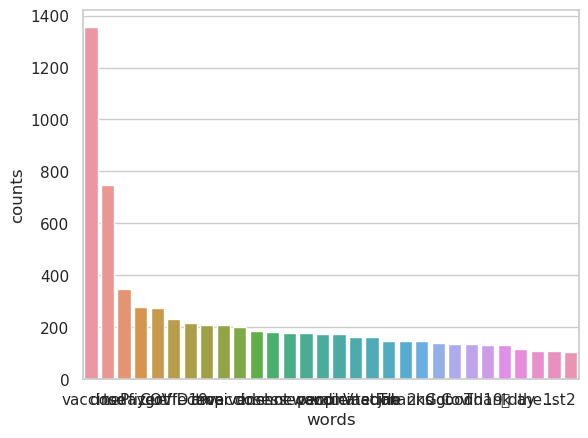

In [409]:
sns.barplot(x='words', y='counts', data=pos_df);

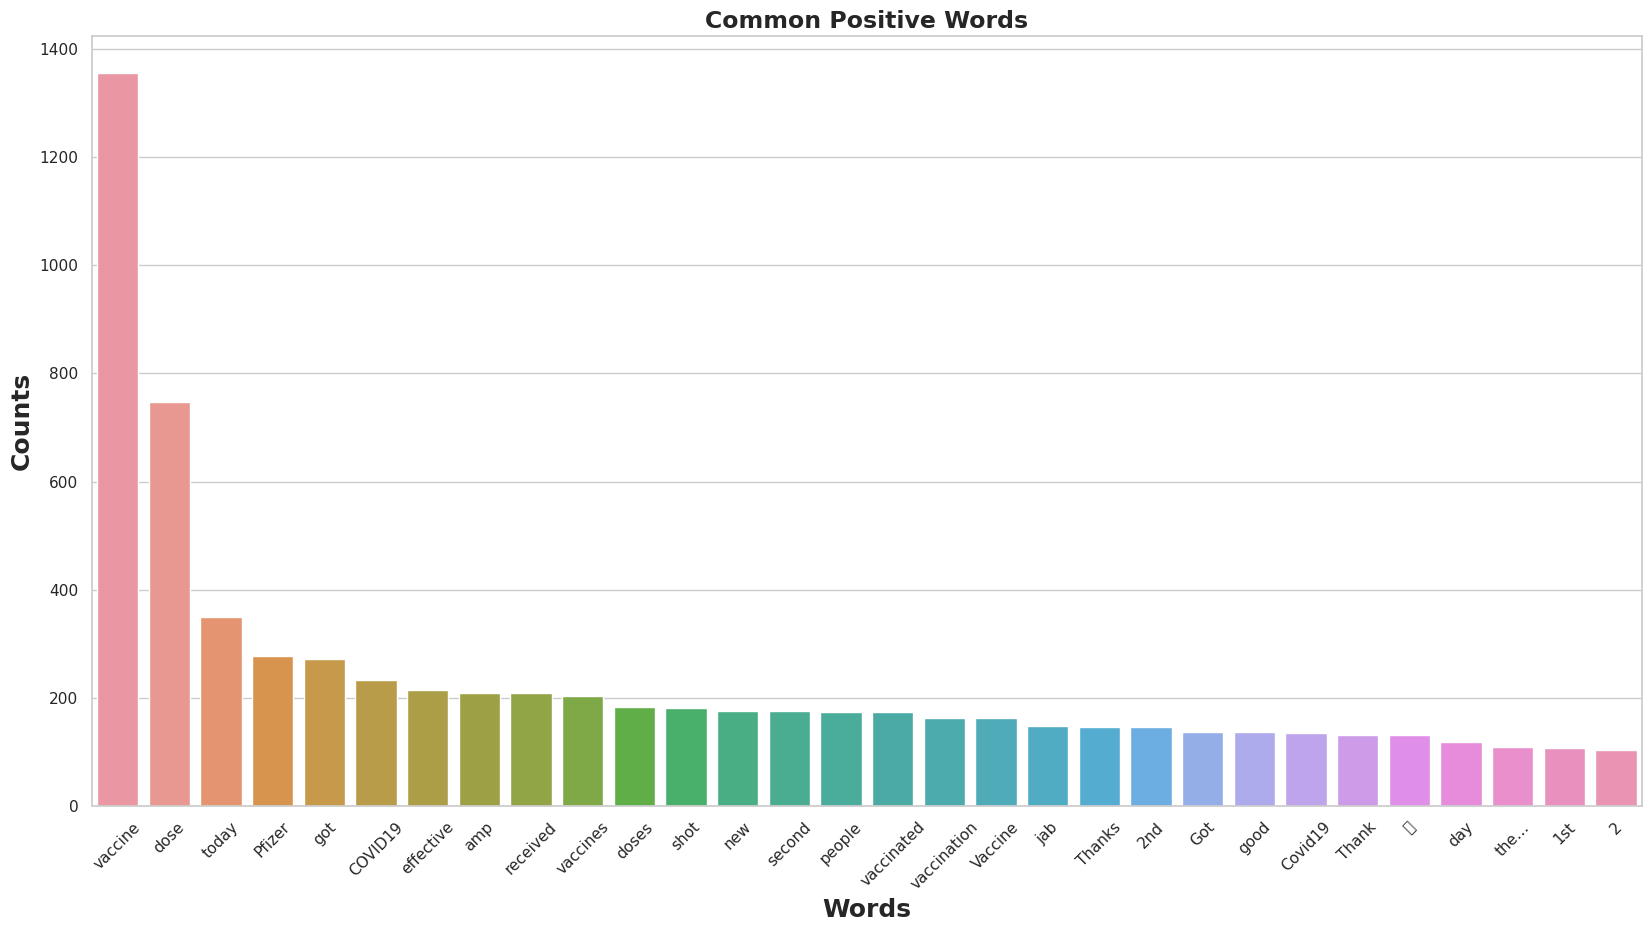

In [410]:
#Most Common positive words
plt.figure(figsize=(20,10))
sns.barplot(x='words', y='counts', data=pos_df);
plt.xticks(rotation=45)
plt.xlabel("Words", size=18, weight="bold")
plt.ylabel("Counts", size=18, weight="bold")
plt.title("Common Positive Words",fontweight="bold",size=17)
plt.show()

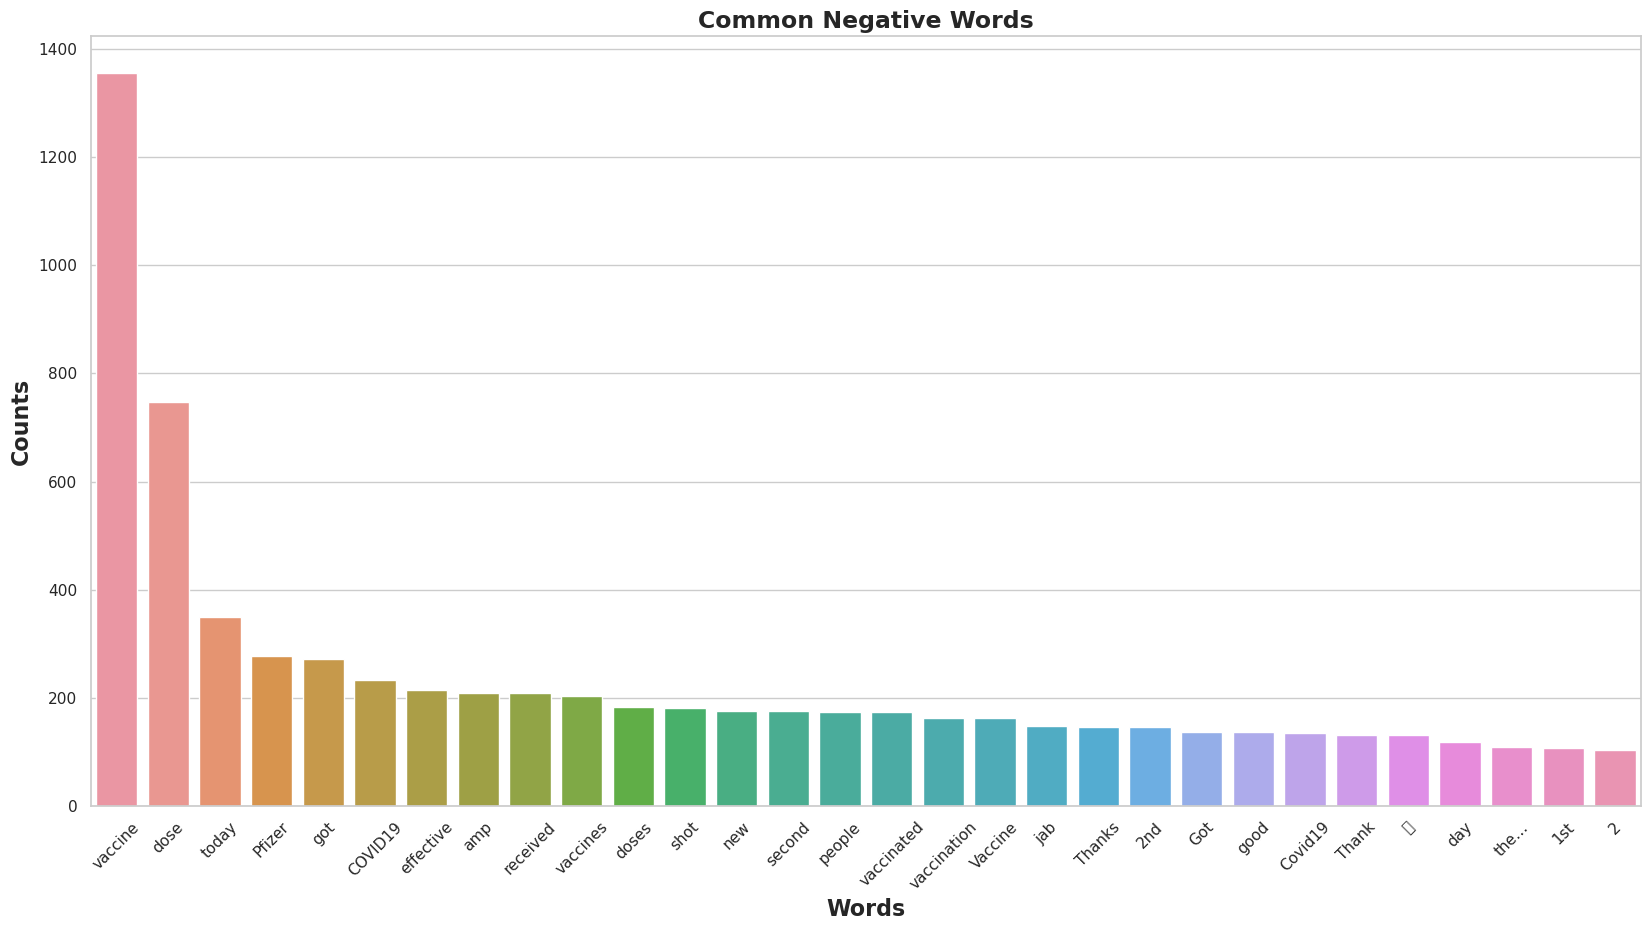

In [411]:
#Most Common Negative words
plt.figure(figsize=(20,10))
sns.barplot(x='words', y='counts', data=neg_df);
plt.xticks(rotation=45)
plt.xlabel("Words", size=16, weight="bold")
plt.ylabel("Counts", size=16, weight="bold")
plt.title("Common Negative Words",fontweight="bold",size=17)
plt.show()

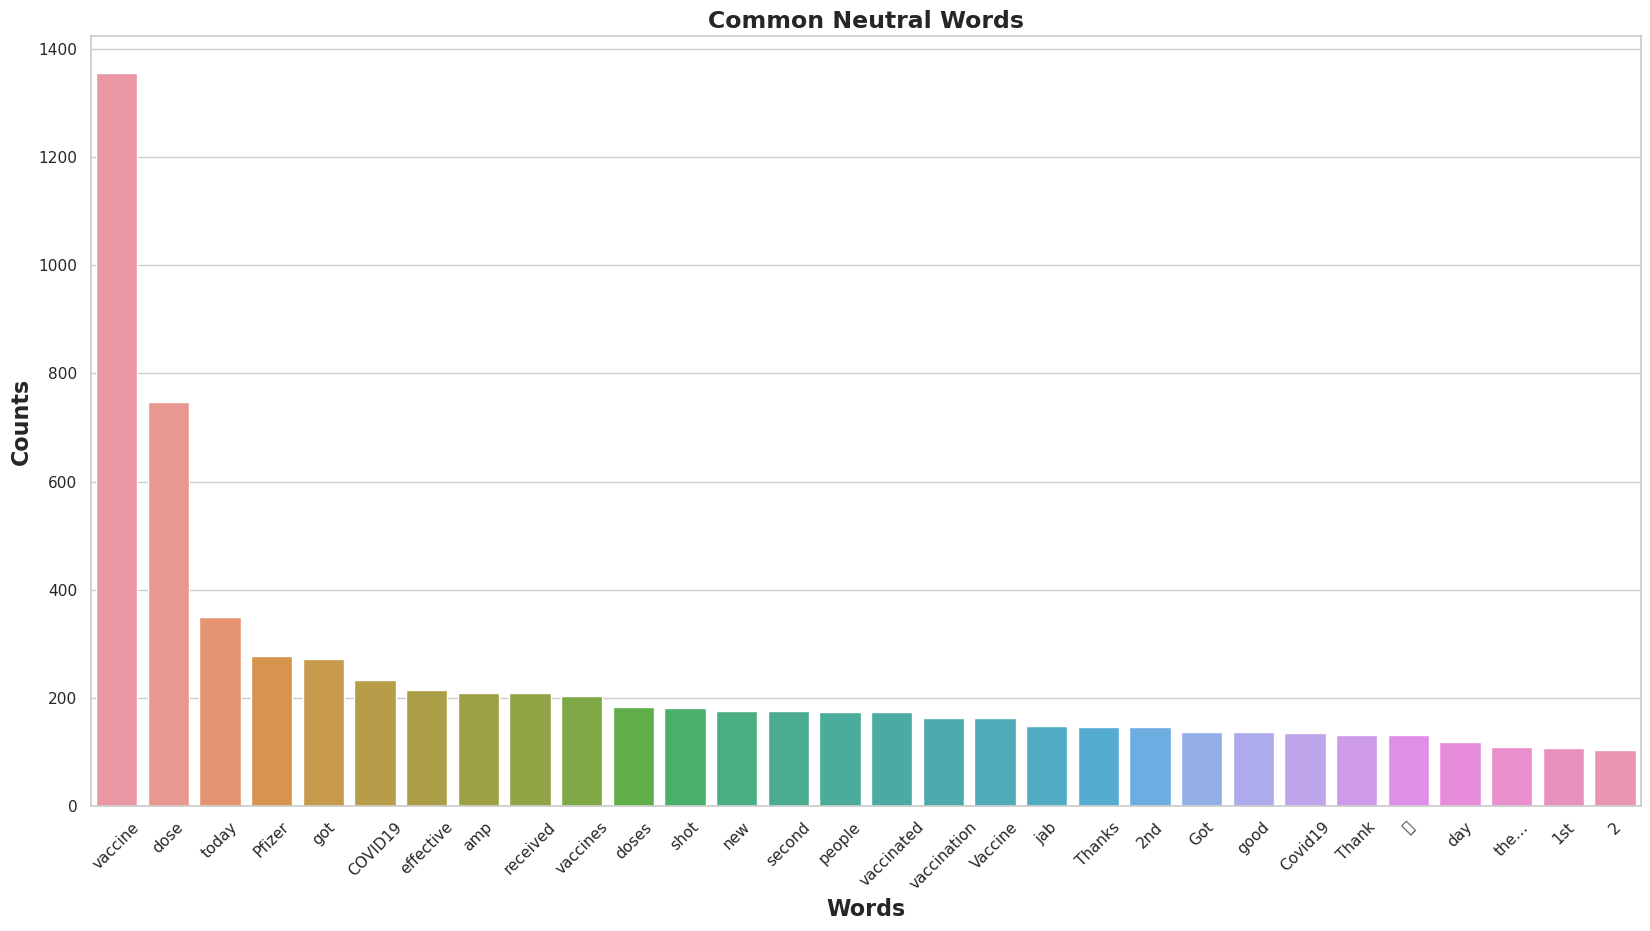

In [412]:
#Most Common Neutral words
plt.figure(figsize=(20,10))
sns.barplot(x='words', y='counts', data=neu_df);
plt.xticks(rotation=45)
plt.xlabel("Words", size=16, weight="bold")
plt.ylabel("Counts", size=16, weight="bold")
plt.title("Common Neutral Words",fontweight="bold",size=17)
plt.show()

In [438]:
#Generating Word clouds
from wordcloud import WordCloud

In [439]:
def plot_wordcloud(docx):
    cloud = WordCloud().generate(docx)
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [440]:
pos_docx = ''.join(pos_tokens)
neg_docx = ''.join(neg_tokens)
neu_docx = ''.join(neu_tokens)

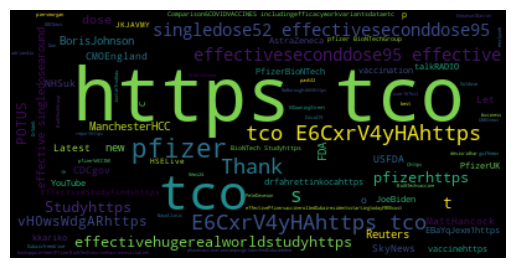

In [441]:
plot_wordcloud(pos_docx)

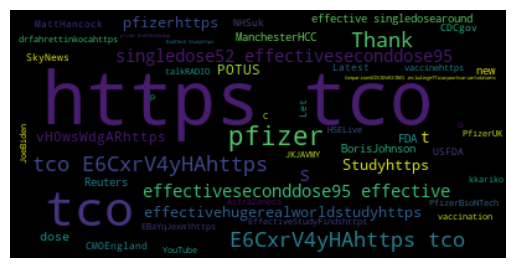

In [442]:
plot_wordcloud(neg_docx)

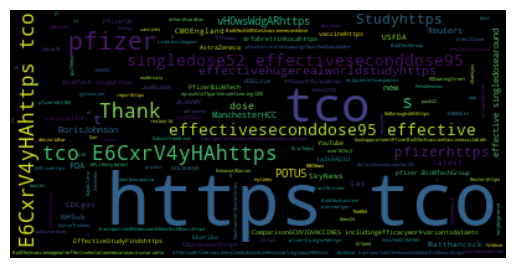

In [443]:
plot_wordcloud(neu_docx)

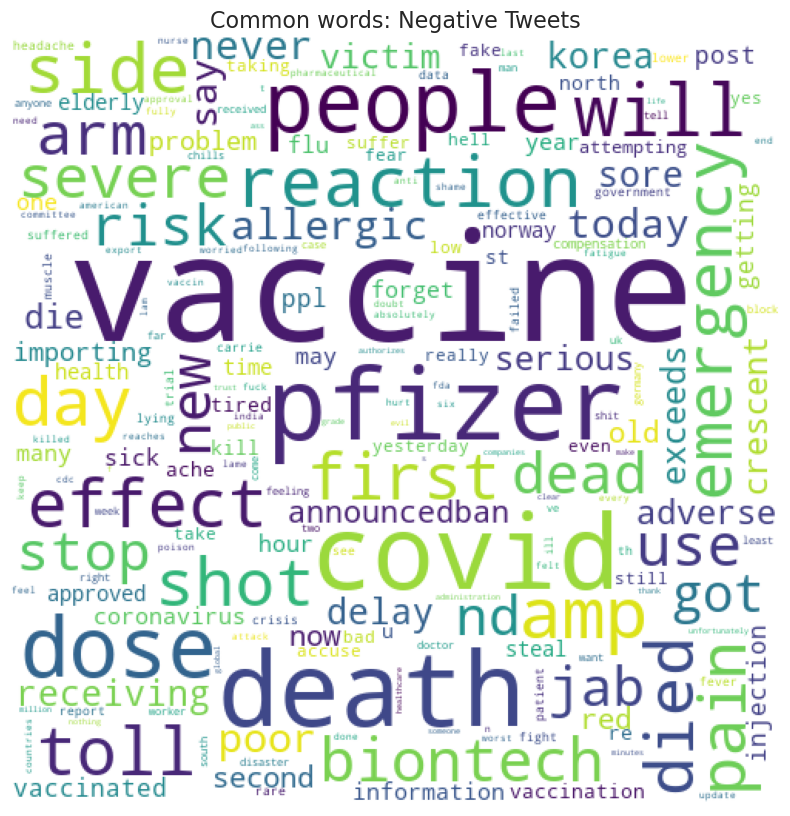

In [444]:
negative = WordCloud(width=500,height=500,collocations = False,background_color='white').generate(Word_Negative)
f = plt.figure(figsize=(20, 10))
plt.title('Common words: Negative Tweets',fontsize=16)
plt.imshow(negative)
plt.axis('off')
plt.show()

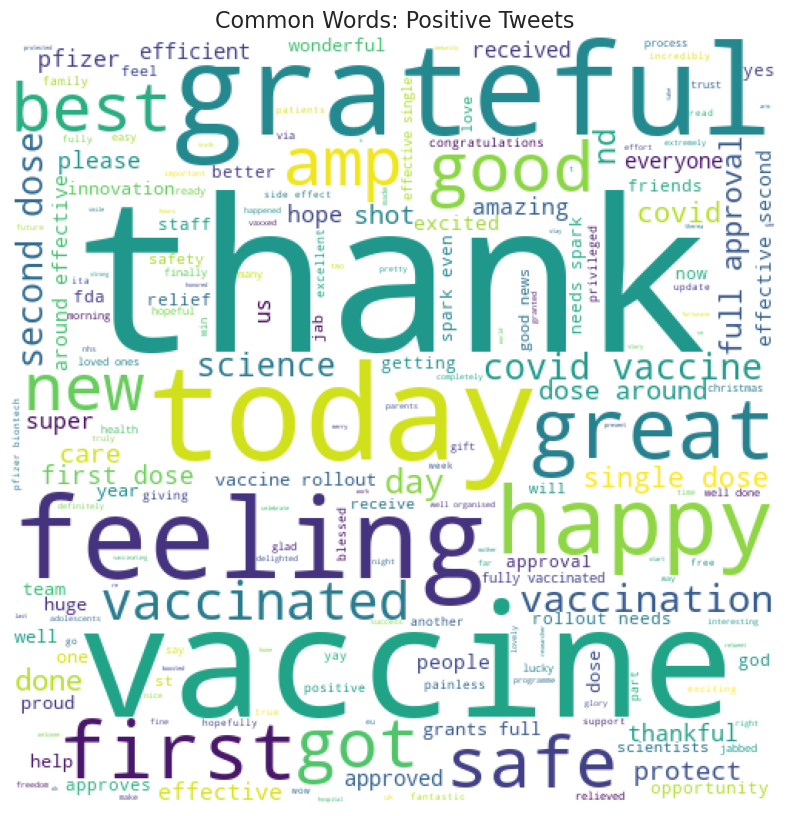

In [435]:
positive = WordCloud(width=500,height=500,background_color='white').generate(Word_Positive)
f = plt.figure(figsize=(10, 10))
plt.title('Common Words: Positive Tweets',fontsize=16)
plt.imshow(positive)
plt.axis('off')
plt.show()

# Machine Learning Models

### Import and manipulate dataset

In [474]:
df2.head(10)

id             user_name                user_location  \
0  1340539111971516416            Rachel Roh    La Crescenta-Montrose, CA   
1  1338158543359250433           Albert Fong            San Francisco, CA   
2  1337858199140118533              eli🇱🇹🇪🇺👌                     Your Bed   
3  1337855739918835717         Charles Adler       Vancouver, BC - Canada   
4  1337854064604966912  Citizen News Channel                          NaN   
5  1337852648389832708                   Dee          Birmingham, England   
6  1337851215875608579     Gunther Fehlinger  Austria, Ukraine and Kosovo   
7  1337850832256176136   Dr.Krutika Kuppalli                          NaN   
8  1337850023531347969           Erin Despas                          NaN   
9  1337842295857623042          Ch.Amjad Ali                    Islamabad   

                                    user_description         user_created  \
0  Aggregator of Asian American news; scanning di...  2009-04-08 17:52:46   
1  Marketing dude, tech geek, heavy metal & '80s ...  2009-09-21 15:27:30   
2                                     heil, hydra 🖐☺  2020-06-25 23:30:28   
3  Hosting "CharlesAdlerTonight" Global News Radi...  2008-09-10 11:28:53   
4  Citizen News Channel bringing you an alternati...  2020-04-23 17:58:42   
5  Gastroenterology trainee, Clinical Research Fe...  2020-01-26 21:43:12   
6  End North Stream 2 now - the pipeline of corru...  2013-06-10 17:49:22   
7  ID, Global Health, VHF, Pandemic Prep, Emergin...  2019-03-25 04:14:29   
8  Designing&selling on Teespring. Like 90s Disne...  2009-10-30 17:53:54   
9  #ProudPakistani #LovePakArmy #PMIK @insafiansp...  2012-11-12 04:18:12   

   user_followers  user_friends  user_favourites  user_verified  \
0             405          1692             3247          False   
1             834           666              178          False   
2              10            88              155          False   
3           49165          3933            21853           True   
4             152           580             1473          False   
5             105           108              106          False   
6            2731          5001            69344          False   
7           21924           593             7815           True   
8             887          1515             9639          False   
9             671          2368            20469          False   

                  date  ...               source retweets favorites  \
0  2020-12-20 06:06:44  ...  Twitter for Android        0         0   
1  2020-12-13 16:27:13  ...      Twitter Web App        1         1   
2  2020-12-12 20:33:45  ...  Twitter for Android        0         0   
3  2020-12-12 20:23:59  ...      Twitter Web App      446      2129   
4  2020-12-12 20:17:19  ...   Twitter for iPhone        0         0   
5  2020-12-12 20:11:42  ...   Twitter for iPhone        0         0   
6  2020-12-12 20:06:00  ...      Twitter Web App        0         4   
7  2020-12-12 20:04:29  ...   Twitter for iPhone        2        22   
8  2020-12-12 20:01:16  ...      Twitter Web App        2         1   
9  2020-12-12 19:30:33  ...      Twitter Web App        0         0   

   is_retweet                                 extracted_hashtags  \
0       False                                  [#PfizerBioNTech]   
1       False                                                 []   
2       False  [#coronavirus, #SputnikV, #AstraZeneca, #Pfize...   
3       False                                                 []   
4       False      [#whereareallthesickpeople, #PfizerBioNTech…]   
5       False                                                 []   
6       False                                     [#vaccination]   
7       False                     [#BidenHarris, #Election2020…]   
8       False  [#CovidVaccine, #covid19, #PfizerBioNTech, #Mo...   
9       False  [#CovidVaccine, #COVID19Vaccine, #US, #pakustv...   

                                         clean_tweet  \

In [478]:
#Drop unused column variables
df3 = df2.drop(["id","user_name","user_location", "text", "extracted_hashtags", "sentiment_results", "user_description","user_created","date", "source", "user_friends","polarity", "subjectivity", "user_favourites","is_retweet"], axis=1)

In [479]:
df3.head(5)

user_followers  user_verified  \
0             405          False   
1             834          False   
2              10          False   
3           49165           True   
4             152          False   

                                            hashtags  retweets  favorites  \
0                                 ['PfizerBioNTech']         0          0   
1                                                NaN         1          1   
2  ['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...         0          0   
3                                                NaN       446       2129   
4     ['whereareallthesickpeople', 'PfizerBioNTech']         0          0   

                                         clean_tweet sentiment  
0  Same folks said daikon paste could treat a cyt...   Neutral  
1  While the world has been on the wrong side of ...  Negative  
2              Russian vaccine is created to last...   Neutral  
3  Facts are immutable Senator even when youre no...  Negative  
4  Explain to me again why we need a vaccine @Bor...   Neutral

In [480]:
data = df3

### Train Test Split

In [482]:
from sklearn.model_selection import train_test_split

#stratification means training and test subsets that have the same proportions of class labels as the input dataset.
train,valid = train_test_split(data,test_size = 0.2,random_state=0,stratify = data.sentiment.values)

print("train shape : ", train.shape)
print("valid shape : ", valid.shape)


train shape :  (8816, 7)
valid shape :  (2204, 7)


In [484]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

X_train = vectorizer.fit_transform(train.clean_tweet.values)
X_valid = vectorizer.transform(valid.clean_tweet.values)

y_train = train.sentiment.values
y_valid = valid.sentiment.values

print("X_train.shape : ", X_train.shape)
print("X_train.shape : ", X_valid.shape)
print("y_train.shape : ", y_train.shape)
print("y_valid.shape : ", y_valid.shape)

X_train.shape :  (8816, 20821)
X_train.shape :  (2204, 20821)
y_train.shape :  (8816,)
y_valid.shape :  (2204,)


In [498]:
y_train

array(['Positive', 'Neutral', 'Negative', ..., 'Negative', 'Neutral',
       'Positive'], dtype=object)

In [504]:
[y_valid]

[array(['Positive', 'Neutral', 'Negative', ..., 'Positive', 'Negative',
        'Negative'], dtype=object)]

In [505]:
from sklearn.metrics import classification_report

### Naive Bayes

In [506]:
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_valid)
NB_accuracy = accuracy_score(y_valid,NB_prediction)
print("training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Validation accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_valid))


training accuracy Score    :  0.922073502722323
Validation accuracy Score :  0.7441016333938294
              precision    recall  f1-score   support

    Negative       0.06      0.82      0.11        17
     Neutral       0.75      0.83      0.79       958
    Positive       0.90      0.68      0.77      1229

    accuracy                           0.74      2204
   macro avg       0.57      0.78      0.56      2204
weighted avg       0.83      0.74      0.78      2204



### Stochastic Gradient Descent

In [490]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

sgd_clf.fit(X_train,y_train)

sgd_prediction = sgd_clf.predict(X_valid)
sgd_accuracy = accuracy_score(y_valid,sgd_prediction)
print("Training accuracy Score    : ",sgd_clf.score(X_train,y_train))
print("Validation accuracy Score : ",sgd_accuracy )
print(classification_report(sgd_prediction,y_valid))



Training accuracy Score    :  0.9987522686025408
Validation accuracy Score :  0.867059891107078
              precision    recall  f1-score   support

    Negative       0.52      0.71      0.60       166
     Neutral       0.95      0.85      0.90      1178
    Positive       0.85      0.92      0.89       860

    accuracy                           0.87      2204
   macro avg       0.78      0.83      0.80      2204
weighted avg       0.88      0.87      0.87      2204



### Random Forest Classification

In [491]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train,y_train)

rf_prediction = rf_clf.predict(X_valid)
rf_accuracy = accuracy_score(y_valid,rf_prediction)
print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Validation accuracy Score : ",rf_accuracy )
print(classification_report(rf_prediction,y_valid))


Training accuracy Score    :  1.0
Validation accuracy Score :  0.8638838475499092
              precision    recall  f1-score   support

    Negative       0.43      0.82      0.56       118
     Neutral       0.98      0.82      0.89      1252
    Positive       0.84      0.93      0.88       834

    accuracy                           0.86      2204
   macro avg       0.75      0.86      0.78      2204
weighted avg       0.90      0.86      0.87      2204



### Support Vector Machine

In [492]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

svc_prediction = svc.predict(X_valid)
svc_accuracy = accuracy_score(y_valid,svc_prediction)
print("Training accuracy Score    : ",svc.score(X_train,y_train))
print("Validation accuracy Score : ",svc_accuracy )
print(classification_report(svc_prediction,y_valid))

Training accuracy Score    :  0.9565562613430127
Validation accuracy Score :  0.8071687840290381
              precision    recall  f1-score   support

    Negative       0.22      0.84      0.34        58
     Neutral       0.99      0.73      0.84      1409
    Positive       0.75      0.94      0.84       737

    accuracy                           0.81      2204
   macro avg       0.65      0.84      0.67      2204
weighted avg       0.89      0.81      0.83      2204



### Logistic Regression

In [493]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_valid)
logreg_accuracy = accuracy_score(y_valid,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Validation accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_valid))

Training accuracy Score    :  0.9913793103448276
Validation accuracy Score :  0.8516333938294011
              precision    recall  f1-score   support

    Negative       0.41      0.78      0.54       121
     Neutral       0.96      0.81      0.88      1247
    Positive       0.83      0.92      0.87       836

    accuracy                           0.85      2204
   macro avg       0.74      0.84      0.77      2204
weighted avg       0.88      0.85      0.86      2204



### Model Comparisons

In [550]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent'],
    'Test accuracy': [svc_accuracy, logreg_accuracy, 
              rf_accuracy, NB_accuracy, 
              sgd_accuracy,]})

models.sort_values(by='Test accuracy', ascending=False)


Model  Test accuracy
4  Stochastic Gradient Decent       0.867060
2               Random Forest       0.863884
1         Logistic Regression       0.851633
0     Support Vector Machines       0.807169
3                 Naive Bayes       0.744102